# The Interplay of Compile-time and Run-time Options for Performance Prediction

This notebook follows the order and produce all the figures depicted in the related submission, "The Interplay of Compile-time and Run-time Options for Performance Prediction"

#### First, we import some libraries

In [196]:
# for arrays
import numpy as np

# for dataframes
import pandas as pd

# plots
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
# high-level plots
import seaborn as sns

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

# machine learning library
# Principal Component Analysis - determine new axis for representing data
from sklearn.decomposition import PCA
# Random Forests -> vote between decision trees
# Gradient boosting -> instead of a vote, upgrade the same tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
# Decision Tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
# To add interactions in linear regressions models
from sklearn.preprocessing import PolynomialFeatures
# Elasticnet is an hybrid method between ridge and Lasso
from sklearn.linear_model import LinearRegression, ElasticNet
# To separate the data into training and test
from sklearn.model_selection import train_test_split
# Simple clustering (iterative steps)
from sklearn.cluster import KMeans
# get interactions of features
from sklearn.preprocessing import PolynomialFeatures


# we use it to interact with the file system
import os
# compute time
from time import time

# statistics
import scipy.stats as sc
# hierarchical clustering, clusters
from scipy.cluster.hierarchy import linkage, cut_tree, leaves_list
from scipy import stats
# statistical tests
from scipy.stats import mannwhitneyu

### Import data

In [135]:
data_dir = "../data/"
name_systems = ["x264", "xz", "poppler", "nodejs"]

data = dict()
default_data = dict()
inputs_name = dict()

for ns in name_systems:
    
    data_path = data_dir+ns+'/'
    
    list_dir = os.listdir(data_path)
    list_dir.remove('ctime_options.csv')
    list_dir.remove('default')

    inputs_name[ns] = os.listdir(data_path+list_dir[0])
    inputs = inputs_name[ns]
    
    for j in range(len(inputs)):
        for i in range(len(list_dir)):
            loc = data_path+list_dir[i]+'/'+inputs[j]
            data[ns, list_dir[i], j] = pd.read_csv(loc)
        
        default_data[ns, j] = pd.read_csv(data_path+'default/'+inputs[j])

In [136]:
default_data["x264",0]

configurationID  cabac  ref deblock      analyse   me  subme  mixed_ref  \
0                  1      0    1   0:0:0          0:0  dia      0          0   
1                  2      1    1   1:0:0      0x3:0x3  dia      1          0   
2                 11      0    1   1:0:0          0:0  dia      2          0   
3                101      1    2   1:0:0    0x3:0x113  hex      6          1   
4                102      1    2   1:0:0    0x3:0x113  hex      6          1   
..               ...    ...  ...     ...          ...  ...    ...        ...   
196               96      1    2   1:0:0    0x3:0x113  hex      8          0   
197               97      1    2   1:0:0    0x3:0x113  hex      4          1   
198               98      1    2   0:0:0    0x3:0x113  hex      4          0   
199               99      1    5   1:0:0    0x3:0x113  hex      6          1   
200              100      0    3   0:0:0  0x113:0x113  hex      6          1   

     me_range  trellis  ...  scenecut  rc_lookahead  mbtree  qpmax aq-mode  \
0          16        0  ...         0          None       0     69       0   
1          16        0  ...        40          None       0     69       1   
2          16        0  ...         0          None       0     69       0   
3          16        1  ...         0            60       1     69       1   
4          16        1  ...         0            10       1     69       0   
..        ...      ...  ...       ...           ...     ...    ...     ...   
196        16        0  ...        40            20       1     69       1   
197        16        0  ...        40            20       1     69       1   
198        24        0  ...        40            30       1     69       1   
199        16        1  ...        40            30       1     69       1   
200        16        1  ...        40            30       0     69       1   

         size frames      fps      kbs    time  
0    10458804    500  1120.63  4183.52   2.335  
1     8693658    500   563.88  3477.46   4.816  
2     7922913    500   796.37  3169.17   3.443  
3     6559905    500   201.12  2623.96  12.055  
4     8148915    500   237.63  3259.57  12.565  
..        ...    ...      ...      ...     ...  
196   6463472    500   217.79  2585.39  14.122  
197   5893872    500   204.04  2357.55   8.998  
198   5967323    500   316.66  2386.93   7.114  
199   7481509    500   202.00  2992.60  15.600  
200  10500300    500   213.61  4200.12  16.266  

[201 rows x 30 columns]

# RQ1

# RQ1.1

### Compute some boxplot of runtime performances

#### Figure 2a

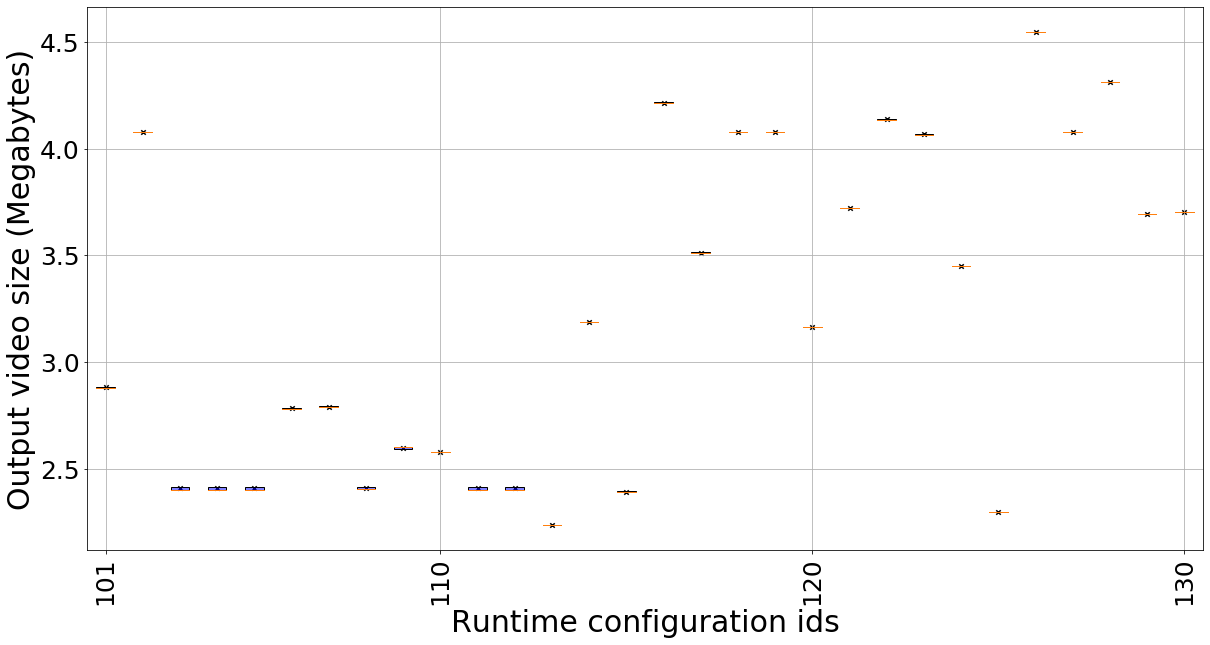

In [4]:
ns ="x264"
dim = "size"
inputs_index = 7

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])


red_square = dict(markerfacecolor='r', marker='s')
plt.figure(figsize=(20,10))
plt.grid()
plt.scatter([k+1 for k in range(30)], [np.mean(l) for l in transposed_listDim[100:130]],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim[100:130], flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))

plt.xticks([k for k in range(1, 31) if k%10==0 or k==1],[k for k in range(101,131) if k%10==0 or k==101], 
           rotation='vertical', size = 25)

#plt.title("x264, Sports video, "+dim, size = 25)
plt.ylabel("Output video size (Megabytes)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [5]:
count_fail = 0
remaining_pvals = []
for i in range(len(listDim)):
    for j in range(len(listDim)):
        try:
            if i!=j:
                remaining_pvals.append(stats.wilcoxon(listDim[i], listDim[j])[1])
        except:
            count_fail+=1
print(count_fail/(len(listDim)**2-len(listDim))*100, "% failures")

46.666666666666664 % failures


In [6]:
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

0.0023844975124377747

In [7]:
np.mean(transposed_listDim)

3.011037094195688

In [8]:
ns ="xz"
dim = "size"
inputs_index = 8

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

2.6666666666989396e-06

In [9]:
np.mean(transposed_listDim)

2.8506282

In [10]:
ns ="poppler"
dim = "size"
inputs_index = 8

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim]/1e6)

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

1.6218750000171478e-05

In [11]:
np.mean(transposed_listDim)

2.363521454166667

#### Figure 2b

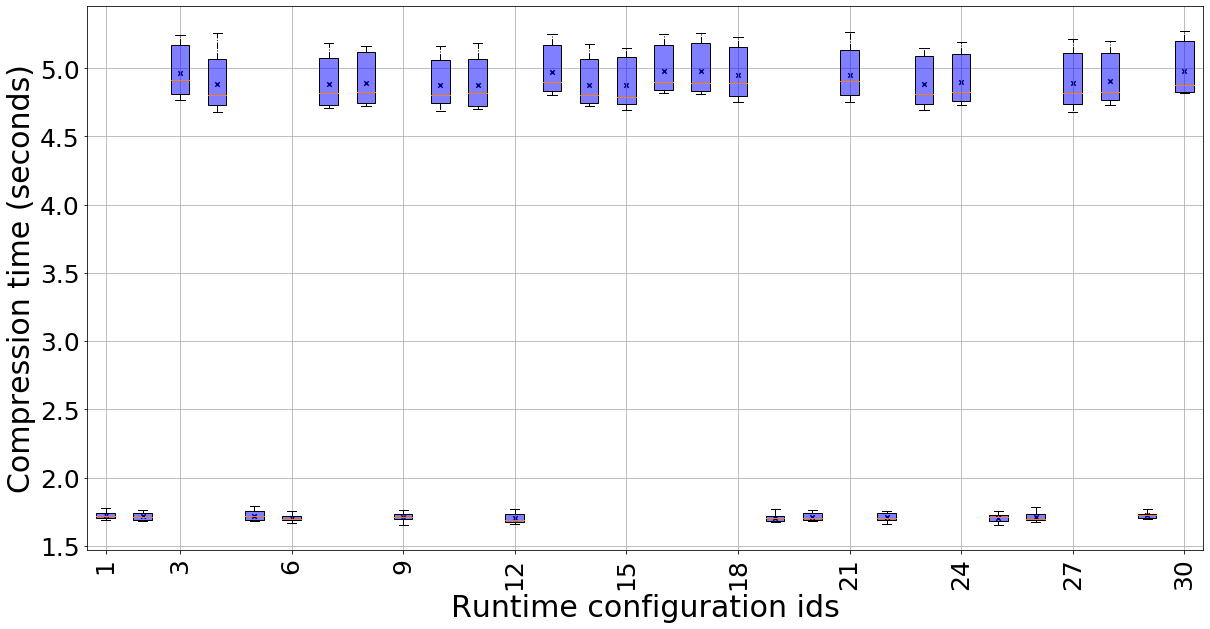

In [12]:
ns ="xz"
dim = "time"
inputs_index = 4

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("xz, Reymont file, "+dim, size = 25)
plt.ylabel("Compression time (seconds)", size = 30)
plt.xlabel("Runtime configuration ids", size = 30)

plt.grid()
plt.scatter([k+1 for k in range(len(transposed_listDim))], [np.mean(l) for l in transposed_listDim],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim, flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
plt.xticks([k for k in range(1,31) if k%3==0 or k==1],[k for k in range(1,31) if k%3==0 or k ==1], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [13]:
stats.wilcoxon(listDim[3], listDim[10])

WilcoxonResult(statistic=14.0, pvalue=6.9798846122882135e-06)

In [14]:
ns ="poppler"
dim = "time"
inputs_index = 8

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

0.02884375

In [15]:
np.mean(transposed_listDim)

2.6650833333333335

In [16]:
ns ="xz"
dim = "time"
inputs_index = 4

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])
    
[np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim][7]

0.37100000000000044

In [17]:
np.mean(transposed_listDim)

3.63616

#### Figure 2c

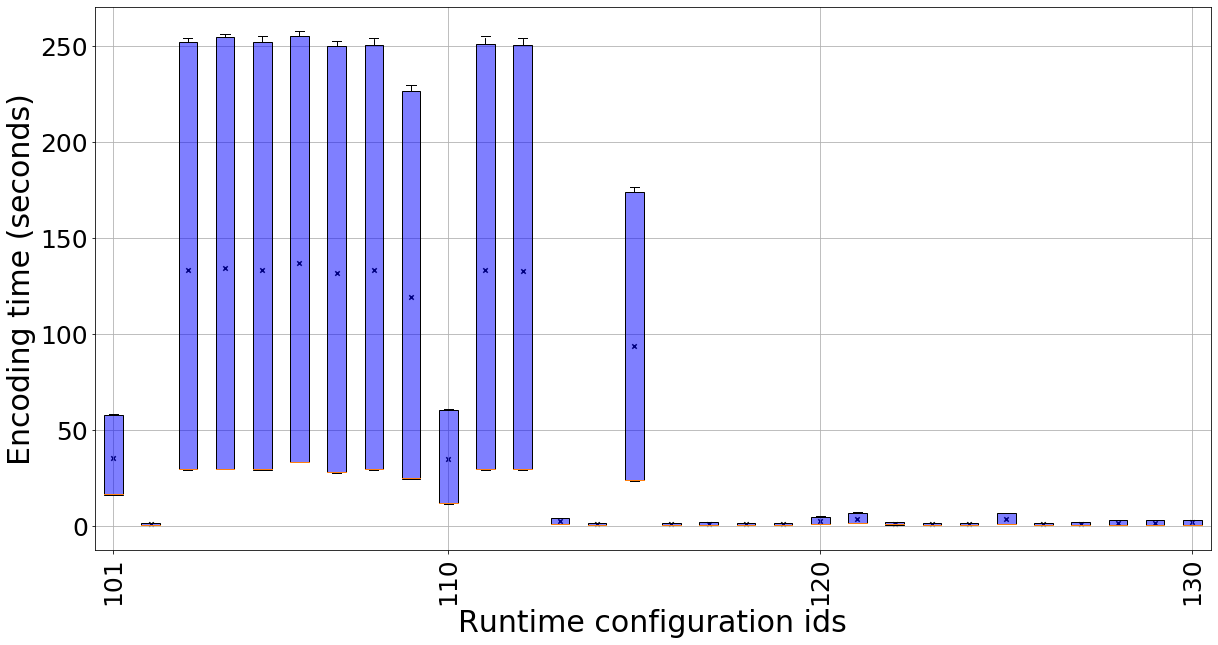

In [18]:
ns ="x264"
dim = "time"
inputs_index = 3

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("x264, Music video, "+dim, size = 30)
plt.ylabel("Encoding time (seconds)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.grid()
plt.scatter([k+1 for k in range(30)], [np.mean(l) for l in transposed_listDim[100:130]],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim[100:130], flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))

plt.xticks([k for k in range(1, 31) if k%10==0 or k==1],[k for k in range(101,131) if k%10==0 or k==101], 
           rotation='vertical', size = 25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [19]:
[np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim][100:130]

[41.487,
 1.0354999999999999,
 222.576,
 225.0385,
 222.44150000000002,
 221.7275,
 221.9965,
 221.064,
 201.67749999999998,
 48.3555,
 221.7025,
 220.8805,
 3.377500000000001,
 1.3170000000000002,
 149.8705,
 1.0554999999999999,
 1.5390000000000001,
 1.0150000000000001,
 1.036,
 4.1114999999999995,
 5.3535,
 1.0915,
 1.1985000000000001,
 1.1855000000000002,
 5.6355,
 1.2109999999999999,
 1.6324999999999998,
 2.3255000000000003,
 2.1975,
 2.5575]

In [20]:
[np.mean(distr) for distr in transposed_listDim][100:130]

[35.64046666666666,
 0.8647333333333334,
 133.57020000000003,
 134.48086666666666,
 133.32726666666667,
 137.03093333333337,
 131.67120000000003,
 133.08426666666668,
 119.13879999999999,
 34.69179999999999,
 133.0613333333333,
 132.88333333333335,
 2.5179333333333327,
 1.0794666666666666,
 94.00446666666667,
 0.8967333333333334,
 1.1708666666666667,
 0.8457333333333333,
 0.8632666666666666,
 2.823066666666666,
 3.917400000000001,
 1.3214666666666668,
 0.9680666666666667,
 0.9881333333333334,
 3.7637333333333336,
 0.9596,
 1.1832,
 1.7437999999999998,
 1.7738666666666665,
 1.9347999999999996]

#### Figure 2d

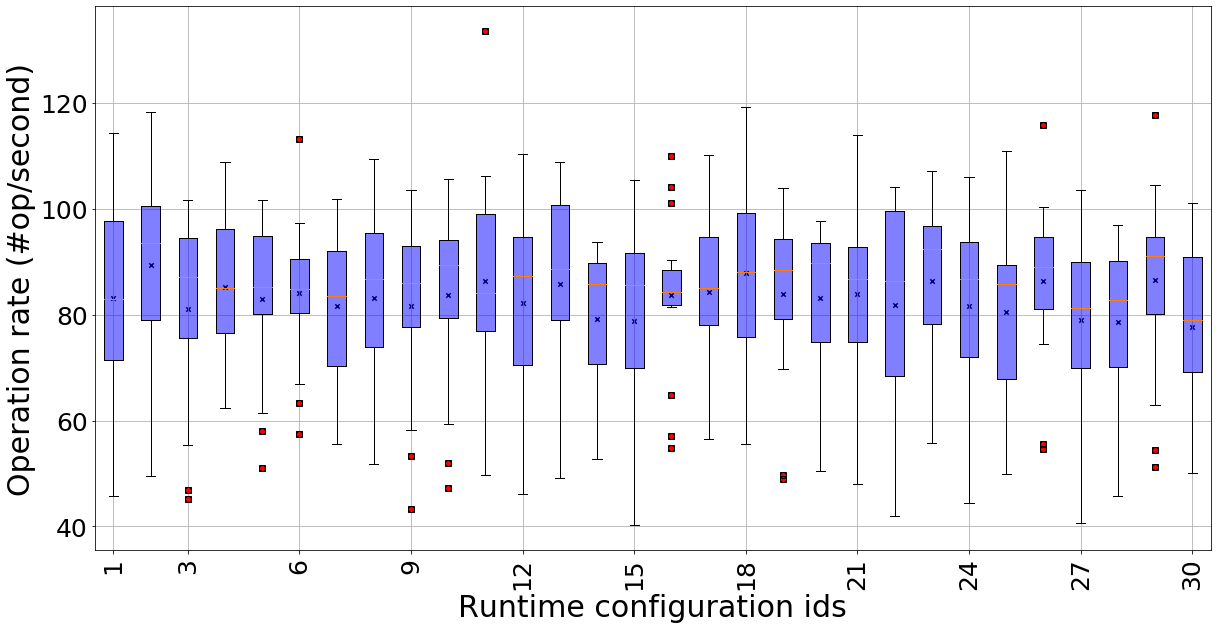

In [21]:
ns ="nodejs"
dim = "ops"
inputs_index = 2

listDim = []
for i in range(len(list_dir)):
    df = data[ns, list_dir[i], inputs_index]
    listDim.append(df[dim])

print()

transposed_listDim = []
for i in range(len(listDim[0])):
    transposed_listDim.append([listDim[j][i] for j in range(len(listDim))])

plt.figure(figsize=(20,10))

#plt.title("nodejs, fsfile script, operation rate", size = 25)
plt.ylabel("Operation rate (#op/second)", size = 30)
plt.xlabel("Runtime configuration ids", size=30)

plt.grid()
plt.scatter([k+1 for k in range(len(transposed_listDim))], [np.mean(l) for l in transposed_listDim],
           marker="x", color = "black", alpha = 1, s = 20)
plt.boxplot(transposed_listDim, flierprops=red_square, 
          vert=True, patch_artist=True, #widths=0.25,
          boxprops=dict(facecolor=(0,0,1,0.5),linewidth=1,edgecolor='k'),
          whiskerprops = dict(linestyle='-.',linewidth=1.0, color='black'))
plt.boxplot(transposed_listDim)
plt.xticks([k for k in range(1,31) if k%3==0 or k==1],[k for k in range(1,31) if k%3==0 or k ==1], 
           rotation='vertical', size =25)
plt.yticks(size=25)
plt.savefig("../results/boxplot_"+ns+"_"+dim+".png")
plt.show()

In [22]:
np.mean([np.percentile(distr,75)-np.percentile(distr,25) for distr in transposed_listDim])

19.165875094818382

In [23]:
np.mean(transposed_listDim)

83.13399220964308

In [24]:
stats.wilcoxon(listDim[1], listDim[3])

WilcoxonResult(statistic=216.0, pvalue=0.7343252914391281)

runtime dist of compile-time options 1 and 3 are not significantly different 

In [25]:
stats.wilcoxon(listDim[1], listDim[11])

WilcoxonResult(statistic=9.0, pvalue=4.285685869189864e-06)

In [26]:
stats.wilcoxon(listDim[4], listDim[8])

WilcoxonResult(statistic=20.0, pvalue=1.2380795614564472e-05)

runtime dist of compile-time options 1 and 11 are significantly different 

# RQ1.2

### Compute the ratio between runtime performances of the compile-time options and the default configuration

#### Table 2a - Average and standard deviation ratios

In [27]:
def get_ratios(name_system, input_index, dim):
    
    list_inputs = inputs_name[name_system]
    
    nb_ctime_configs = len(os.listdir("../data/"+name_system))-2
    
    ratios = []
    
    for i in range(1, nb_ctime_configs+1):
        
        df = data[name_system, str(i), input_index]
        df_def = default_data[name_system, input_index]
        
        ratios.append(df[dim]/df_def[dim])
    
    return (np.round(np.mean(ratios),2), np.round(np.std(ratios),2))

In [28]:
get_ratios("x264", 0, "size")

(1.0, 0.0)

In [29]:
results = dict()

perfs = dict()
perfs["x264"] = ["time", "fps"]
perfs["xz"] = ["time"]
perfs["poppler"] = ["time"]
perfs["nodejs"] = ["ops"]

for ns in name_systems:
    if ns in perfs:
        for p in perfs[ns]:                
            nb_inputs = len(inputs_name[ns])
            for input_index in range(nb_inputs):
                results[ns, input_index+1, p] = get_ratios(ns, input_index, p)

print("\\begin{tabular}{|c|c|c|c|c|c|}")
perfs = sorted(pd.Series([(k[0], k[2]) for k in results.keys()]).unique())
print("\\hline")
print("System")
print("& nodejs")
print("& poppler")
print("& \\multicolumn{2}{|c|}{x264}")
print("& xz")
#for i in range(len(perfs)):
#    print("& "+perfs[i][0])
print("\\\\ \\hline")
print("Perf. $\mathcal{P}$")
for i in range(len(perfs)):
    print("& "+perfs[i][1])
print("\\\\ \\hline")
for i in range(1, 13):
    print("$\mathcal{I}$\\#"+str(i))
    for j in range(len(perfs)):
        if i <= len(inputs_name[perfs[j][0]]):
            if results[perfs[j][0], i, perfs[j][1]]:
                mean_ratios, std_ratios = results[perfs[j][0], i, perfs[j][1]]
                print("& "+str(mean_ratios)+" $\pm$ "+str(std_ratios))
        else:
            print("& \\cellcolor[HTML]{C0C0C0}")
    print("\\\\ \\hline")
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|}
\hline
System
& nodejs
& poppler
& \multicolumn{2}{|c|}{x264}
& xz
\\ \hline
Perf. $\mathcal{P}$
& ops
& time
& fps
& time
& time
\\ \hline
$\mathcal{I}$\#1
& 0.8 $\pm$ 0.34
& 1.0 $\pm$ 0.02
& 0.59 $\pm$ 0.4
& 3.33 $\pm$ 2.4
& 1.01 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#2
& 0.79 $\pm$ 0.36
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.39
& 3.5 $\pm$ 2.53
& 1.16 $\pm$ 0.48
\\ \hline
$\mathcal{I}$\#3
& 0.86 $\pm$ 0.2
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.4
& 3.5 $\pm$ 2.57
& 1.11 $\pm$ 0.32
\\ \hline
$\mathcal{I}$\#4
& 1.01 $\pm$ 0.11
& 1.0 $\pm$ 0.01
& 0.6 $\pm$ 0.39
& 3.26 $\pm$ 2.37
& 1.01 $\pm$ 0.02
\\ \hline
$\mathcal{I}$\#5
& 0.73 $\pm$ 0.41
& 1.0 $\pm$ 0.01
& 0.59 $\pm$ 0.4
& 3.53 $\pm$ 2.62
& 1.02 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#6
& 1.05 $\pm$ 0.21
& 1.0 $\pm$ 0.02
& 0.6 $\pm$ 0.4
& 3.35 $\pm$ 2.49
& 1.01 $\pm$ 0.02
\\ \hline
$\mathcal{I}$\#7
& 0.98 $\pm$ 0.01
& 1.0 $\pm$ 0.07
& 0.58 $\pm$ 0.4
& 3.75 $\pm$ 2.8
& 1.01 $\pm$ 0.03
\\ \hline
$\mathcal{I}$\#8
& 0.84 $\pm$ 

#### Table 2b - Best ratios (minimal time, and max fps or operation per second)

In [30]:
def get_ratios_indic(name_system, input_index, dim, indic):
    
    list_inputs = inputs_name[name_system]
    
    nb_ctime_configs = len(os.listdir("../data/"+name_system))-2
    
    ratios = []
    
    for i in range(1, nb_ctime_configs+1):
        
        df = data[name_system, str(i), input_index]
        df_def = default_data[name_system, input_index]
        
        ratios.append(df[dim]/df_def[dim])
    
    if indic == "max":
        res = np.round(np.max(ratios), 2)
    if indic == "min":
        res = np.round(np.min(ratios), 2)
    
    return res

results = dict()

perfs = dict()
perfs["x264"] = ["time", "fps"]
perfs["xz"] = ["time"]
perfs["poppler"] = ["time"]
perfs["nodejs"] = ["ops"]

for ns in name_systems:
    if ns in perfs:
        for p in perfs[ns]:
            nb_inputs = len(inputs_name[ns])
            if p == "time":
                for input_index in range(nb_inputs):
                    results[ns, input_index+1, p] = get_ratios_indic(ns, input_index, p, "min")
            else:
                for input_index in range(nb_inputs):
                    results[ns, input_index+1, p] = get_ratios_indic(ns, input_index, p, "max")
                    
print("\\begin{tabular}{|c|c|c|c|c|c|}")
perfs = sorted(pd.Series([(k[0], k[2]) for k in results.keys()]).unique())
print("\\hline")
print("System")
print("& nodejs")
print("& poppler")
print("& \\multicolumn{2}{|c|}{x264}")
print("& xz")
#for i in range(len(perfs)):
#    print("& "+perfs[i][0])
print("\\\\ \\hline")
print("Perf. $\mathcal{P}$")
for i in range(len(perfs)):
    print("& "+perfs[i][1])
print("\\\\ \\hline")
for i in range(1, 13):
    print("$\mathcal{I}$\\#"+str(i))
    for j in range(len(perfs)):
        if i <= len(inputs_name[perfs[j][0]]):
            if results[perfs[j][0], i, perfs[j][1]]:
                print("& "+str(results[perfs[j][0], i, perfs[j][1]]))
        else:
            print("& \\cellcolor[HTML]{C0C0C0}")
    print("\\\\ \\hline")
print("\\end{tabular}")

\begin{tabular}{|c|c|c|c|c|c|}
\hline
System
& nodejs
& poppler
& \multicolumn{2}{|c|}{x264}
& xz
\\ \hline
Perf. $\mathcal{P}$
& ops
& time
& fps
& time
& time
\\ \hline
$\mathcal{I}$\#1
& 1.06
& 0.95
& 1.12
& 0.94
& 0.95
\\ \hline
$\mathcal{I}$\#2
& 1.08
& 0.98
& 1.14
& 0.93
& 0.98
\\ \hline
$\mathcal{I}$\#3
& 1.48
& 0.98
& 1.12
& 0.95
& 0.97
\\ \hline
$\mathcal{I}$\#4
& 1.68
& 0.97
& 1.27
& 0.83
& 0.96
\\ \hline
$\mathcal{I}$\#5
& 1.18
& 0.97
& 1.1
& 0.94
& 0.96
\\ \hline
$\mathcal{I}$\#6
& 2.3
& 0.95
& 1.68
& 0.51
& 0.97
\\ \hline
$\mathcal{I}$\#7
& 1.01
& 0.84
& 1.35
& 0.94
& 0.94
\\ \hline
$\mathcal{I}$\#8
& 2.28
& 0.97
& 1.12
& 0.93
& 0.97
\\ \hline
$\mathcal{I}$\#9
& 1.04
& 0.95
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.97
\\ \hline
$\mathcal{I}$\#10
& 1.09
& 0.92
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.97
\\ \hline
$\mathcal{I}$\#11
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& \cellcolor[HTML]{C0C0C0}
& 0.

# RQ2

### Spearman correlogram

In [31]:
# We define a function to plot the correlogram
def plot_correlationmatrix_dendogram(ns, dim):
    # ns : name_system
    # dim : dimension
    # output : a plot of an ordered correlogram of the different compile-time options
    
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    for input_index in range(len(inputs_name[ns])):
        
        # matrix of coorelations
        corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

        for i in range(nb_ctime):
            for j in range(nb_ctime):
                # A distribution of bitrates will have a correlaiton of 1 with itself
                if (i == j):
                    corr[i][j] = 1
                else:
                    # we compute the Spearman correlation between the input video i and the input video j
                    corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                              data[ns, str(j+1), input_index][dim]).correlation
                    #corr[i][j] = np.corrcoef(data[ns, str(i+1), input_index][dim],
                    #                                data[ns, str(j+1), input_index][dim])[0,1]
                    

        # we transform our matrix into a dataframe
        df = pd.DataFrame(corr)

        # group the videos, we choose the ward method 
        # single link method (minimum of distance) leads to numerous tiny clusters
        # centroid or average tend to split homogeneous clusters
        # and complete link aggregates unbalanced groups. 
        links = linkage(df, method="ward",)
        order = leaves_list(links)

        # we order the correlation following the aggregation clustering
        mask = np.zeros_like(corr, dtype=np.bool)

        for i in range(nb_ctime):
            for j in range(nb_ctime):
                # Generate a mask for the upper triangle
                if i>j:
                    mask[order[i]][order[j]] = True
        
        g = sns.clustermap(df, cmap="vlag", mask=mask, method="ward",
                       linewidths=0, figsize=(13, 13), #cbar_kws={"ticks":ticks}, 
                       vmin =-1)
        g.ax_heatmap.set_yticklabels([])
        #g.ax_heatmap.set_xticklabels([])
        g.ax_heatmap.tick_params(right=False, bottom=False)
        # abcissa and ordered labels
        g.ax_heatmap.set_xlabel("Compile-time options", fontsize = 18)
        g.ax_heatmap.set_ylabel("Compile-time options", fontsize = 18)
        # we save the figure in the result folder
        plt.savefig("../results/"+ns+"/"+"corr_"+str(input_index+1)+"_"+dim+".png")
        # we show the graph
        plt.show()

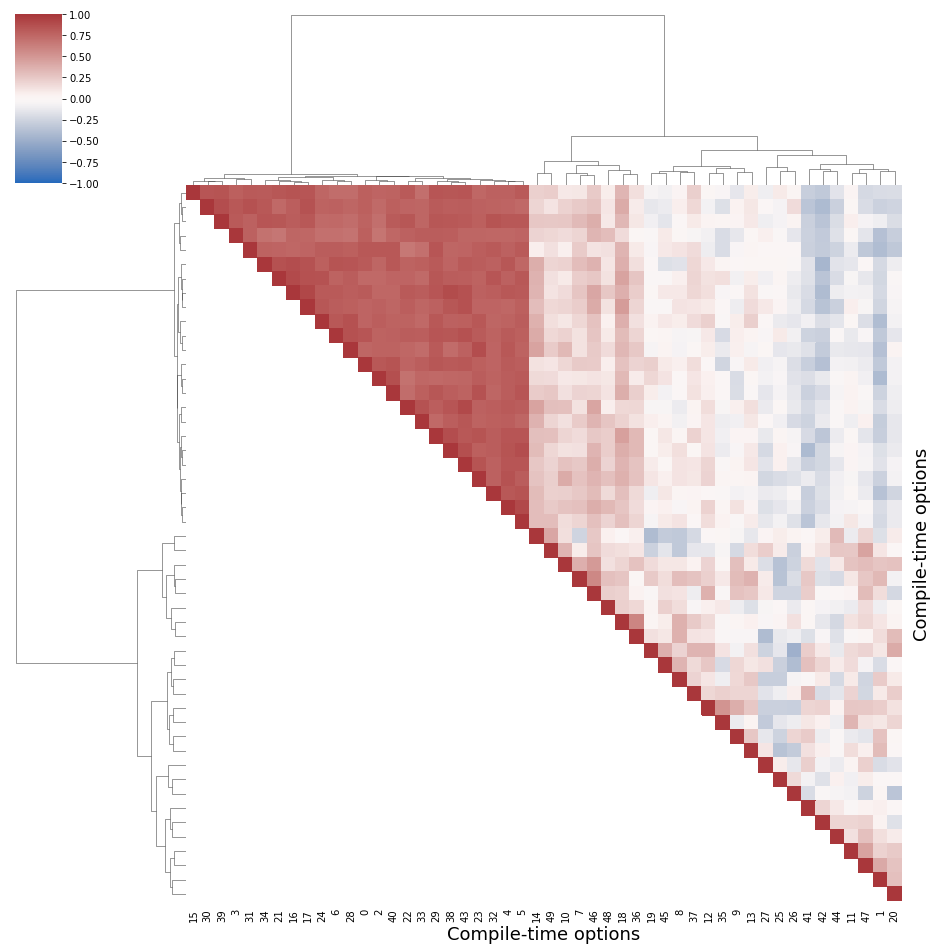

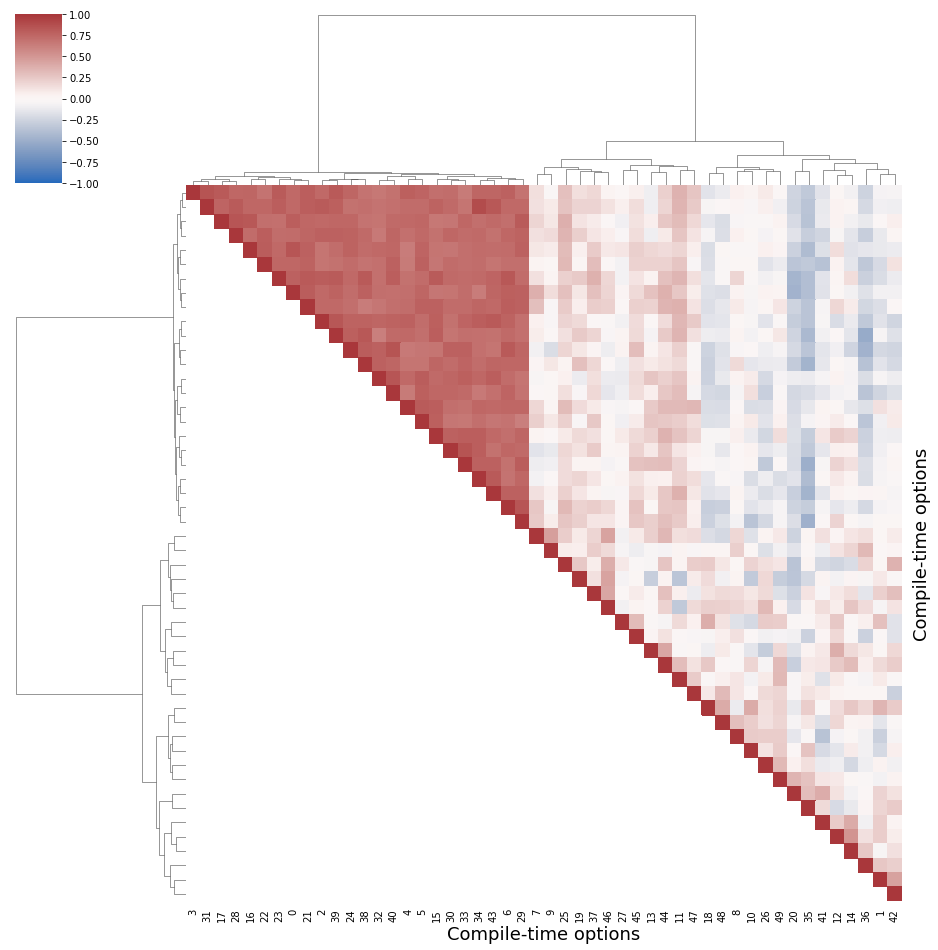

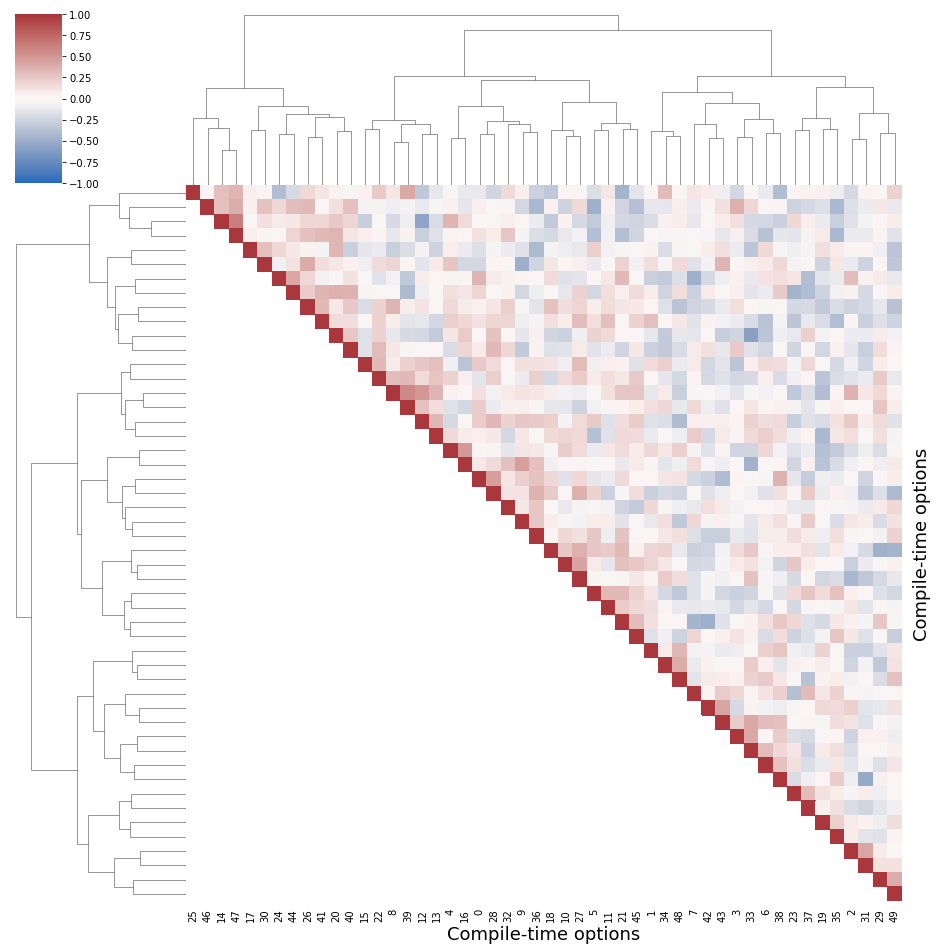

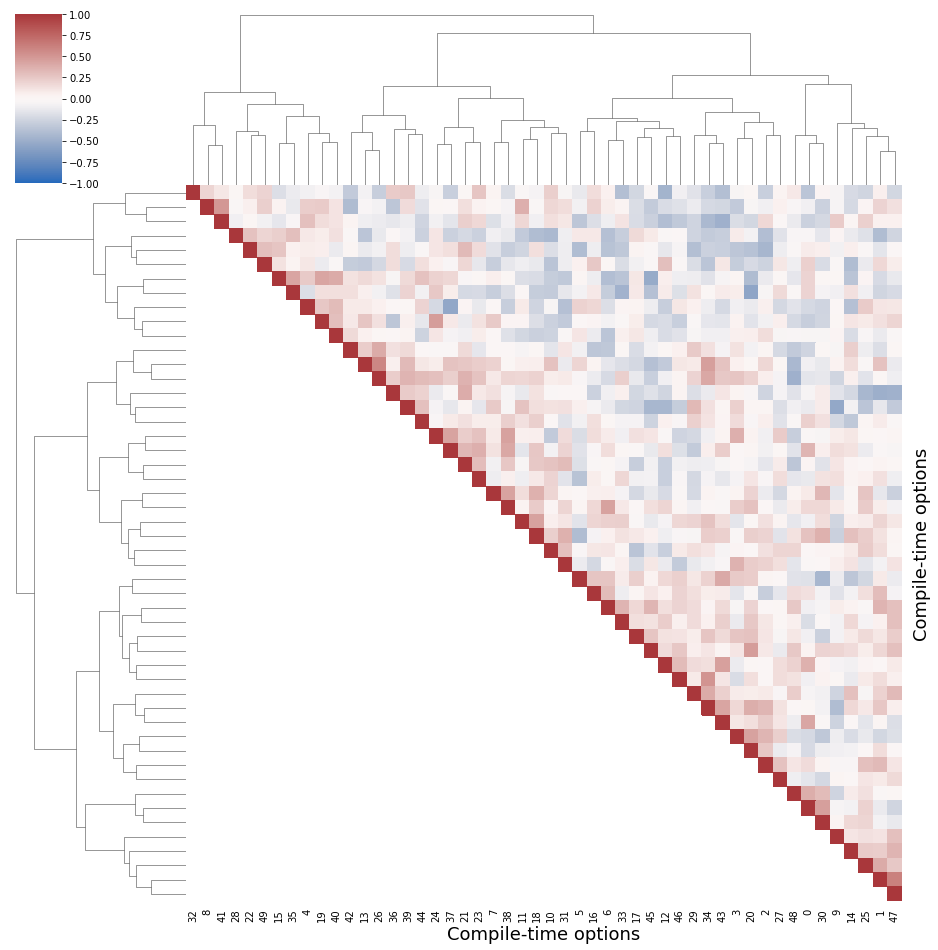

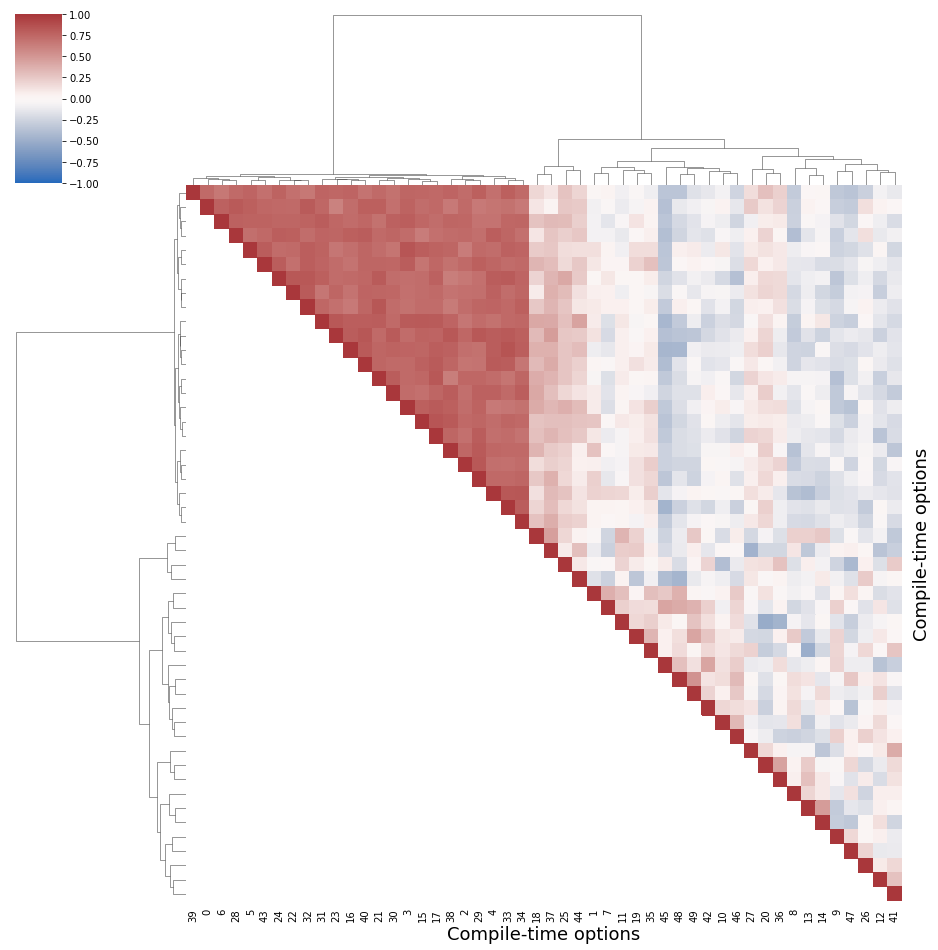

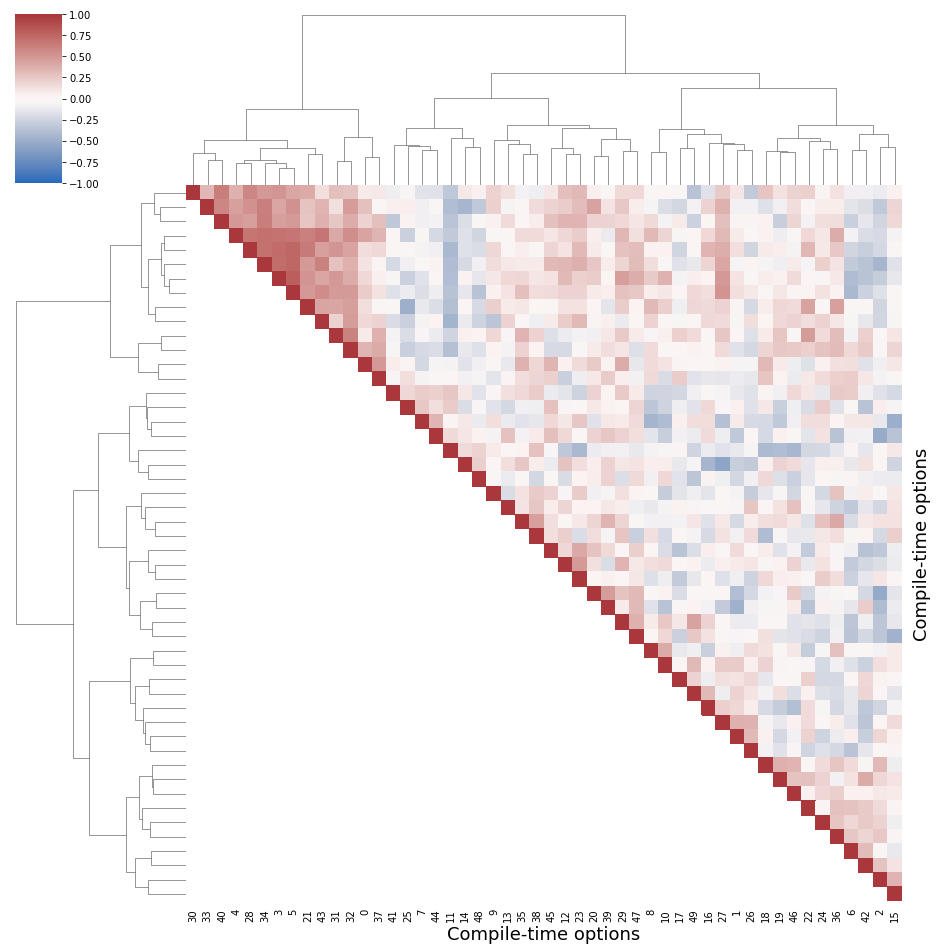

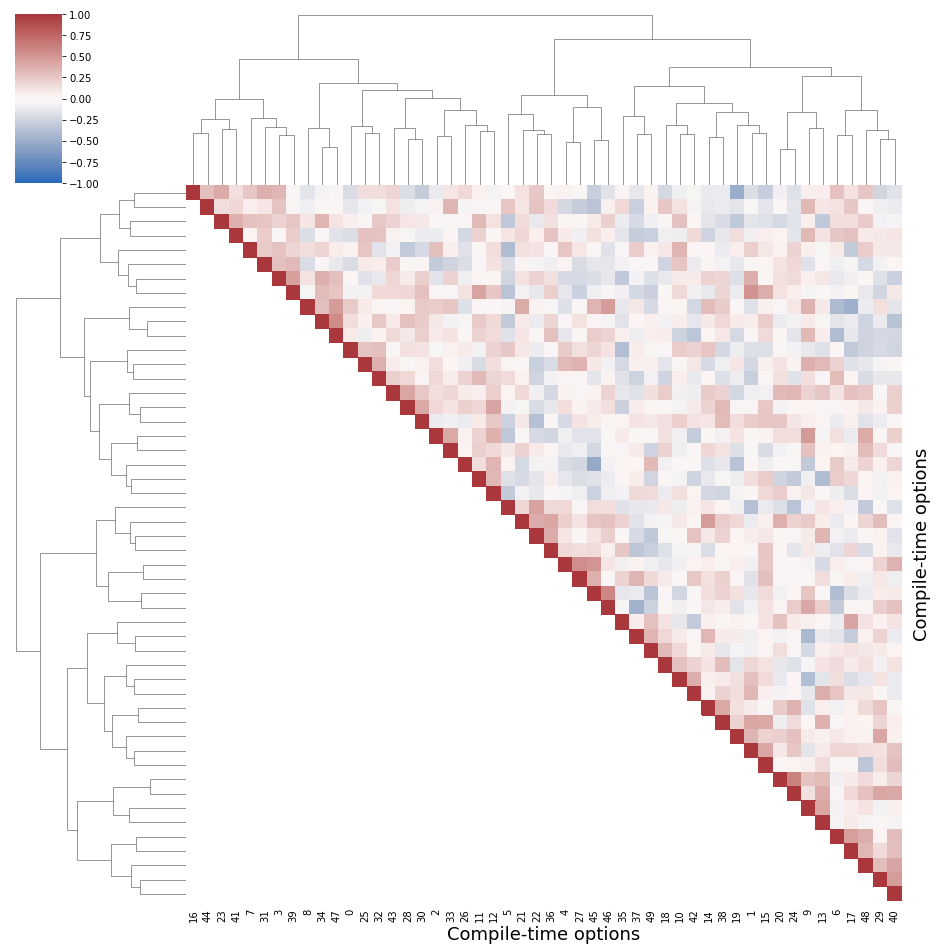

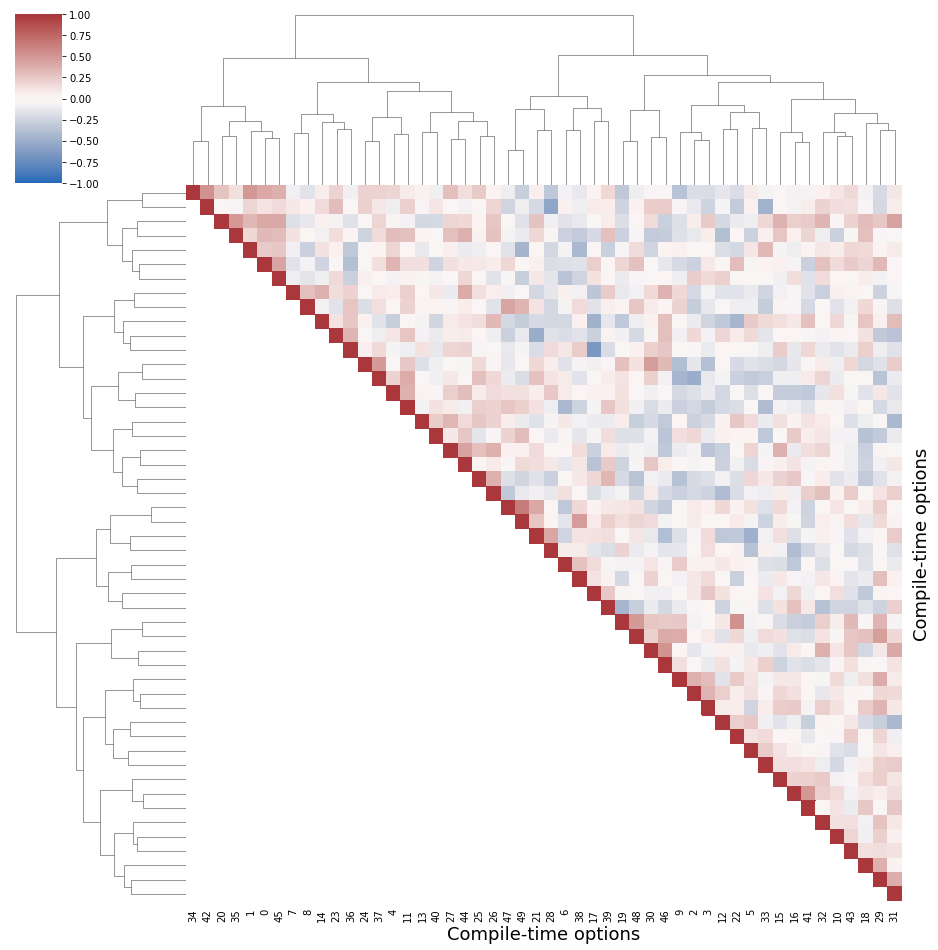

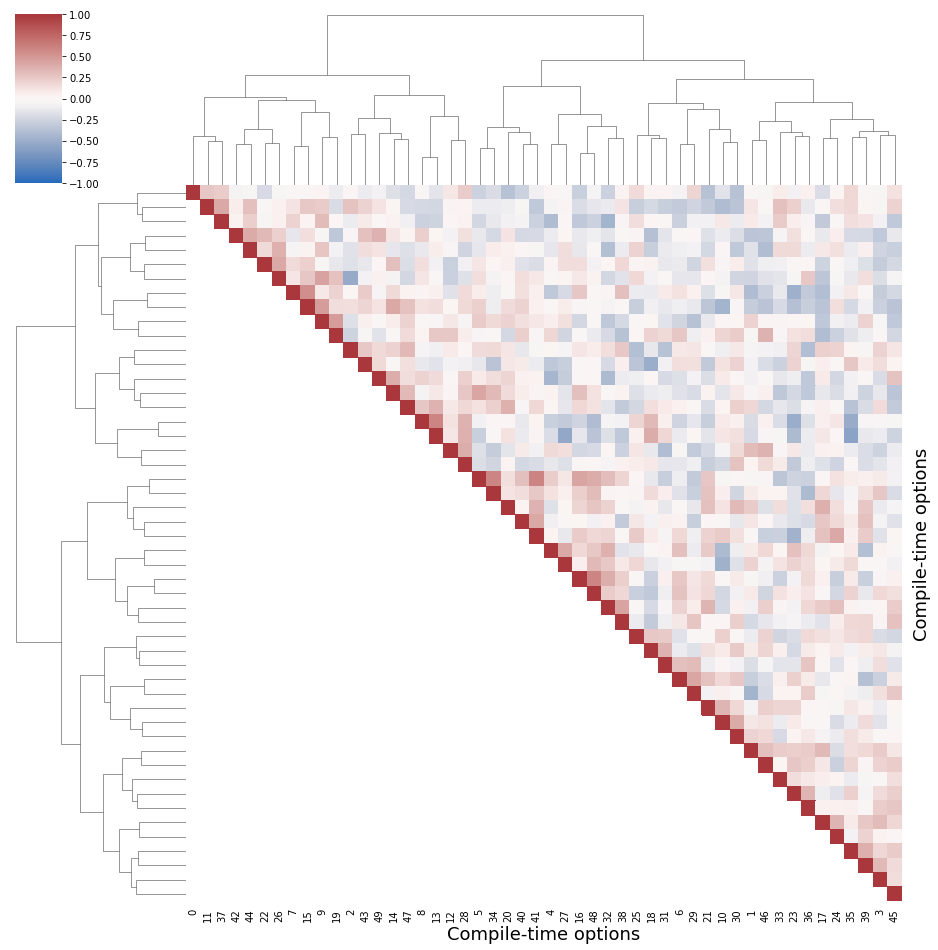

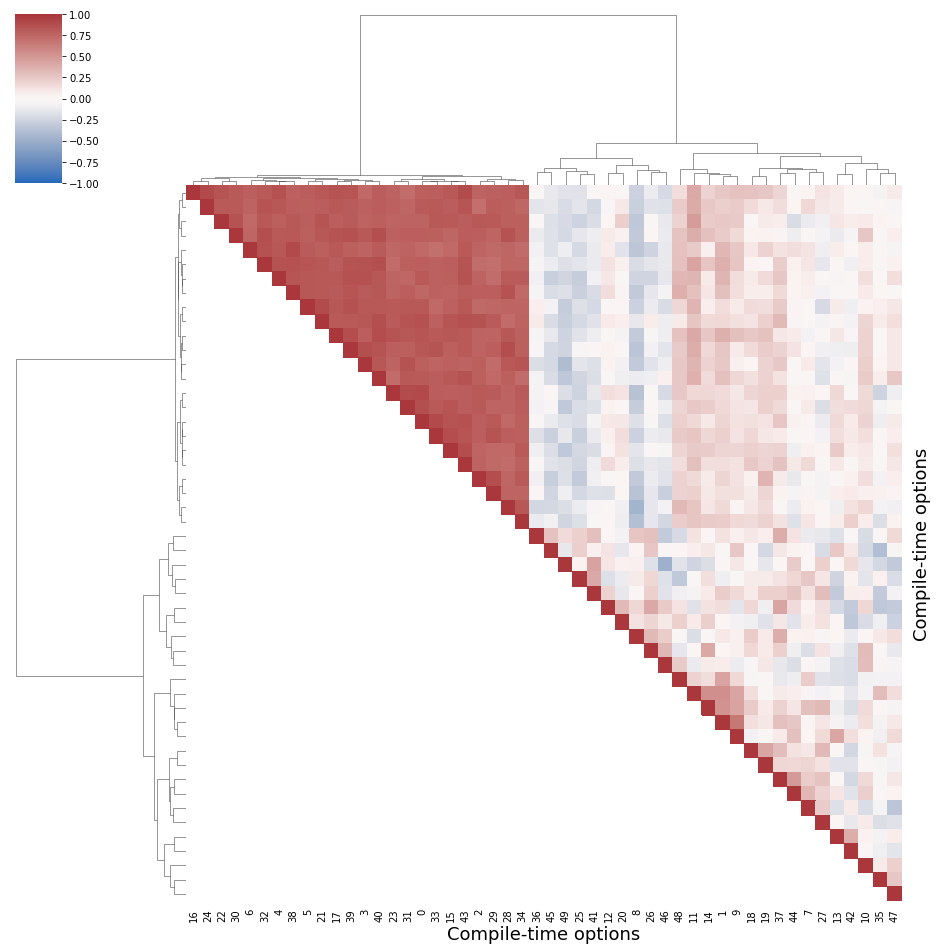

In [32]:
plot_correlationmatrix_dendogram("nodejs", "ops")

In [33]:
#plot_correlationmatrix_dendogram("x264", "size")
#plot_correlationmatrix_dendogram("xz", "size")
#plot_correlationmatrix_dendogram("poppler", "size")

In [34]:
ns = "x264"
dim = "time"
input_index = 7

for input_index in range(8):
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2

    # matrix of correlations
    corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

    for i in range(nb_ctime):
        for j in range(nb_ctime):
            if (i == j):
                corr[i][j] = 1
            else:
                corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                          data[ns, str(j+1), input_index][dim]).correlation

    print(np.min(corr))

0.9852766941893456
0.9905966420115357
0.9889012774503306
0.9852833332426543
0.9851935755829316
0.9759527056213879
0.986045868973618
0.9880227574996305


In [35]:
ns = "xz"
dim = "time"

for input_index in range(8):
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2

    # matrix of correlations
    corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

    for i in range(nb_ctime):
        for j in range(nb_ctime):
            if (i == j):
                corr[i][j] = 1
            else:
                corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                          data[ns, str(j+1), input_index][dim]).correlation

    print(np.min(corr))

0.7379310344827587
0.804093897511019
0.7923017069830488
0.5435726244016578
0.780102381482306
0.7743156212261543
0.6259321129473634
0.7155575339416873


In [36]:
ns = "x264"
dim = "time"

for input_index in range(8):
    # number of videos
    nb_ctime = len(os.listdir(data_dir+ns))-2

    # matrix of correlations
    corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

    for i in range(nb_ctime):
        for j in range(nb_ctime):
            if (i == j):
                corr[i][j] = 1
            else:
                corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                          data[ns, str(j+1), input_index][dim]).correlation

    print(np.min(corr))

0.9852766941893456
0.9905966420115357
0.9889012774503306
0.9852833332426543
0.9851935755829316
0.9759527056213879
0.986045868973618
0.9880227574996305


In [37]:
ns = "nodejs"
dim = "ops"
input_index = 9

# number of videos
nb_ctime = len(os.listdir(data_dir+ns))-2

# matrix of correlations
corr = [[0 for x in range(nb_ctime)] for y in range(nb_ctime)]

for i in range(nb_ctime):
    for j in range(nb_ctime):
        if (i == j):
            corr[i][j] = 1
        else:
            corr[i][j] = sc.spearmanr(data[ns, str(i+1), input_index][dim],
                                      data[ns, str(j+1), input_index][dim]).correlation

In [38]:
np.mean(corr[16][24])

0.9038932146829811

In [39]:
np.mean(corr[40][23])

0.7294771968854282

In [40]:
np.mean(corr[27][13])

0.011345939933259176

In [41]:
np.mean(corr[29][8])

-0.3539488320355951

### Binary trees

In [42]:
perfs = dict()

perfs["nodejs"] = ["ops"]
perfs["poppler"] = ["time", "size"]
perfs["x264"] = ["kbs", "fps", "size", "time", "frames"]
perfs["xz"] = ["time", "size"]

def aggregate_data(ns, input_index, dim):
    
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    ctime_data = pd.read_csv(data_dir+ns+"/ctime_options.csv")
    
    # we delete the other perfs to avoid ocnsidering them as predicting variables
    to_delete_perfs = list(perfs[ns])
    to_delete_perfs.remove(dim)
    to_delete_perfs.append('configurationID')
    
    aggreg_vals = []

    for index_comp in range(nb_ctime):
        
        val = ctime_data.iloc[index_comp][1:]
        
        df_runtime = data[ns, str(index_comp+1), input_index]
        df_runtime = df_runtime.drop(to_delete_perfs, axis = 1)
        
        df_runtime_modif = pd.get_dummies(df_runtime.drop([dim], axis=1))
        df_runtime_modif[dim] = df_runtime[dim]
        
        for rt_config_id in range(df_runtime.shape[0]):
            aggreg_vals.append(list(tuple(val) + tuple(df_runtime_modif.loc[rt_config_id])))
        
    res_df = pd.DataFrame(aggreg_vals)
    res_df.columns = list(tuple(ctime_data.columns[1:]) + tuple(df_runtime_modif.columns))
    
    return res_df

def draw_tree(ns, input_index, dim, max_depth):
    
    res_df = aggregate_data(ns, input_index, dim)

    y = res_df[dim]
    X = res_df.drop([dim], axis=1)

    dt = DecisionTreeRegressor(max_depth = max_depth)
    dt.fit(X,y)

    plt.figure(figsize=(20,20))
    plot_tree(dt, feature_names=res_df.columns, filled=True)
    plt.savefig("../results/"+ns+"/tree_input_"+str(input_index+1)+"_"+dim+".png")
    plt.show()

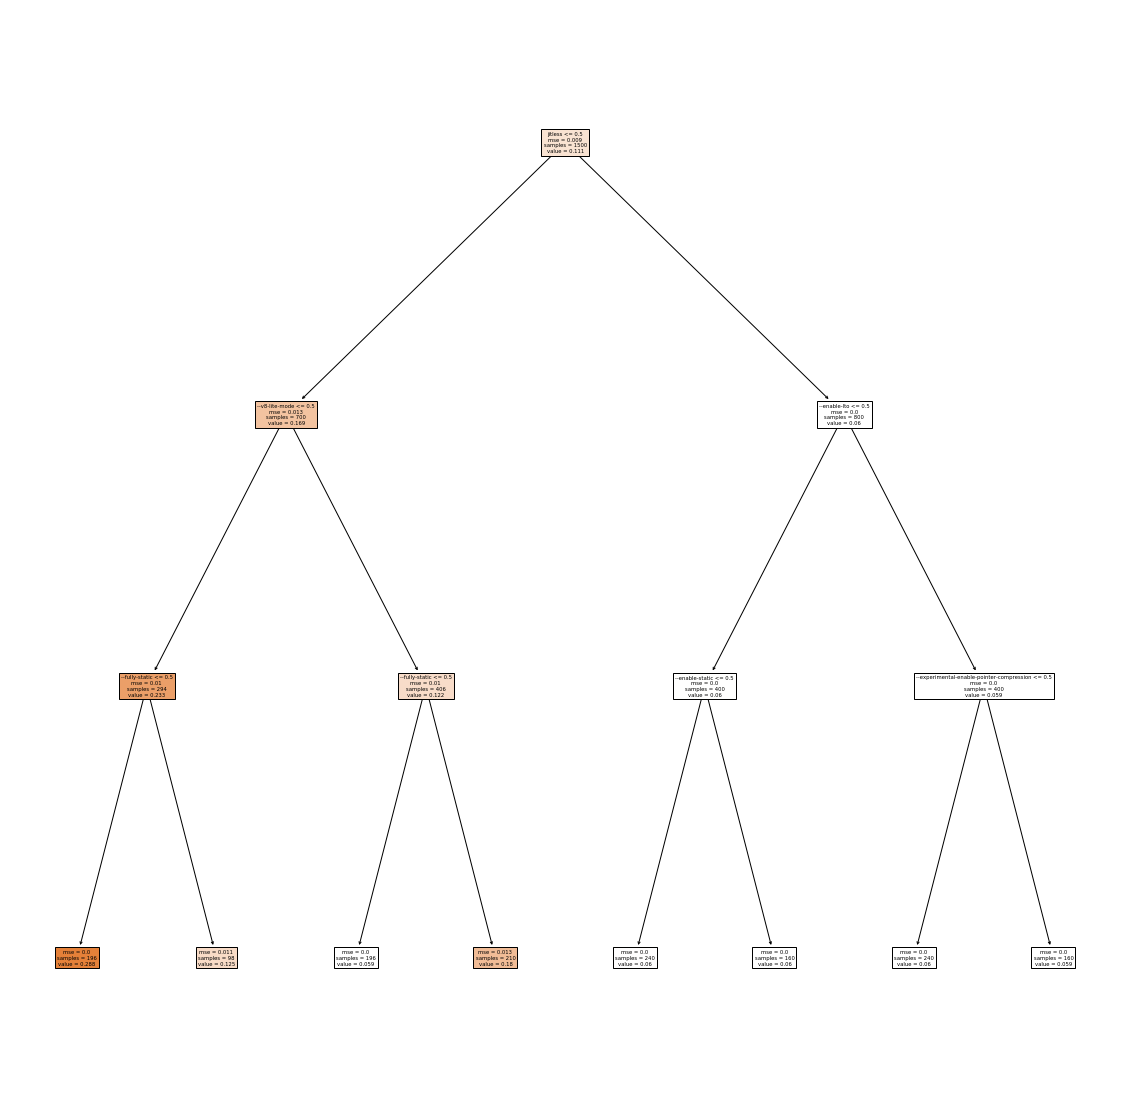

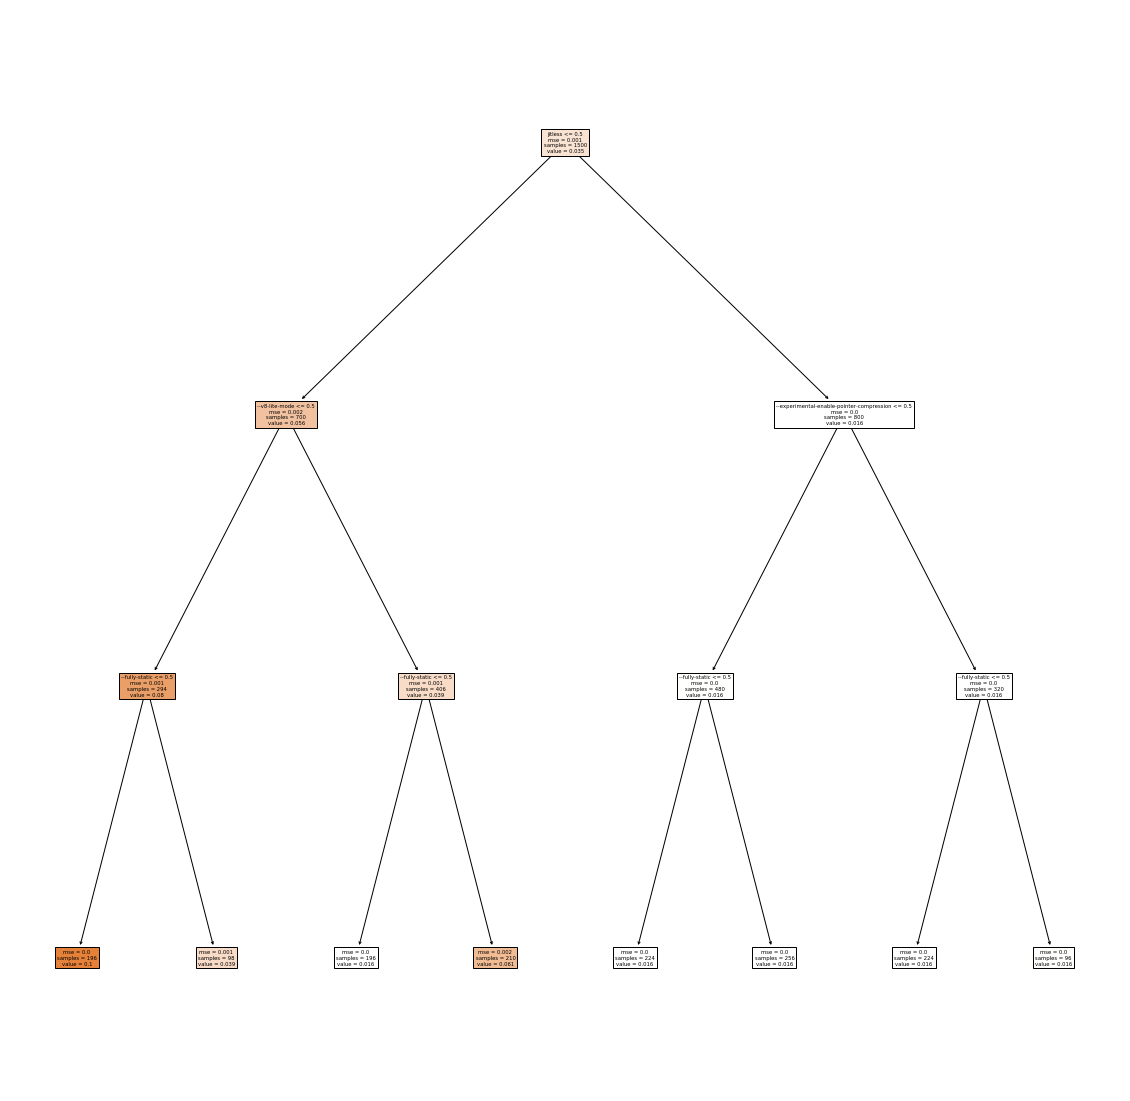

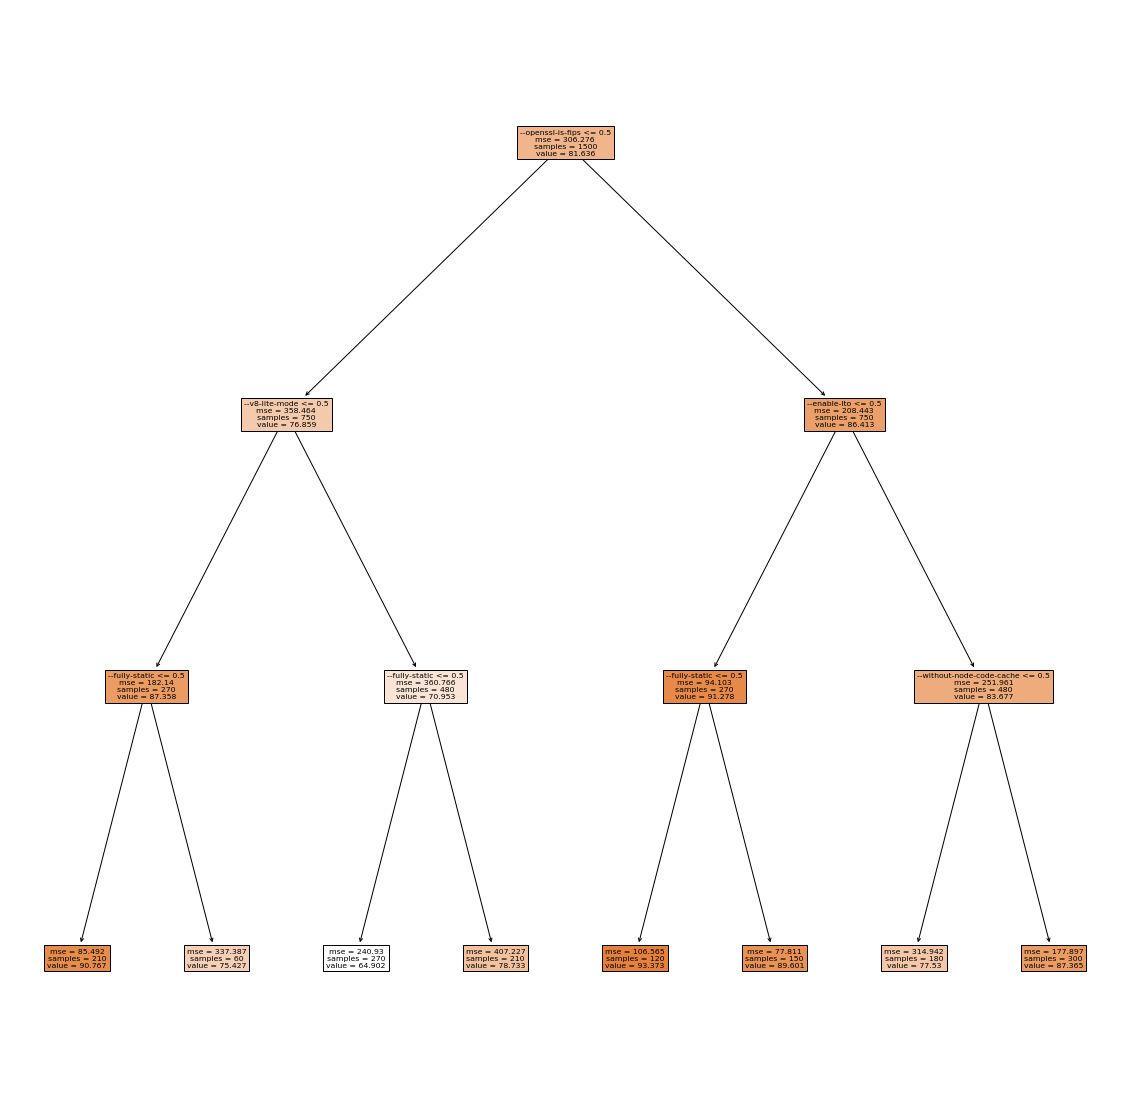

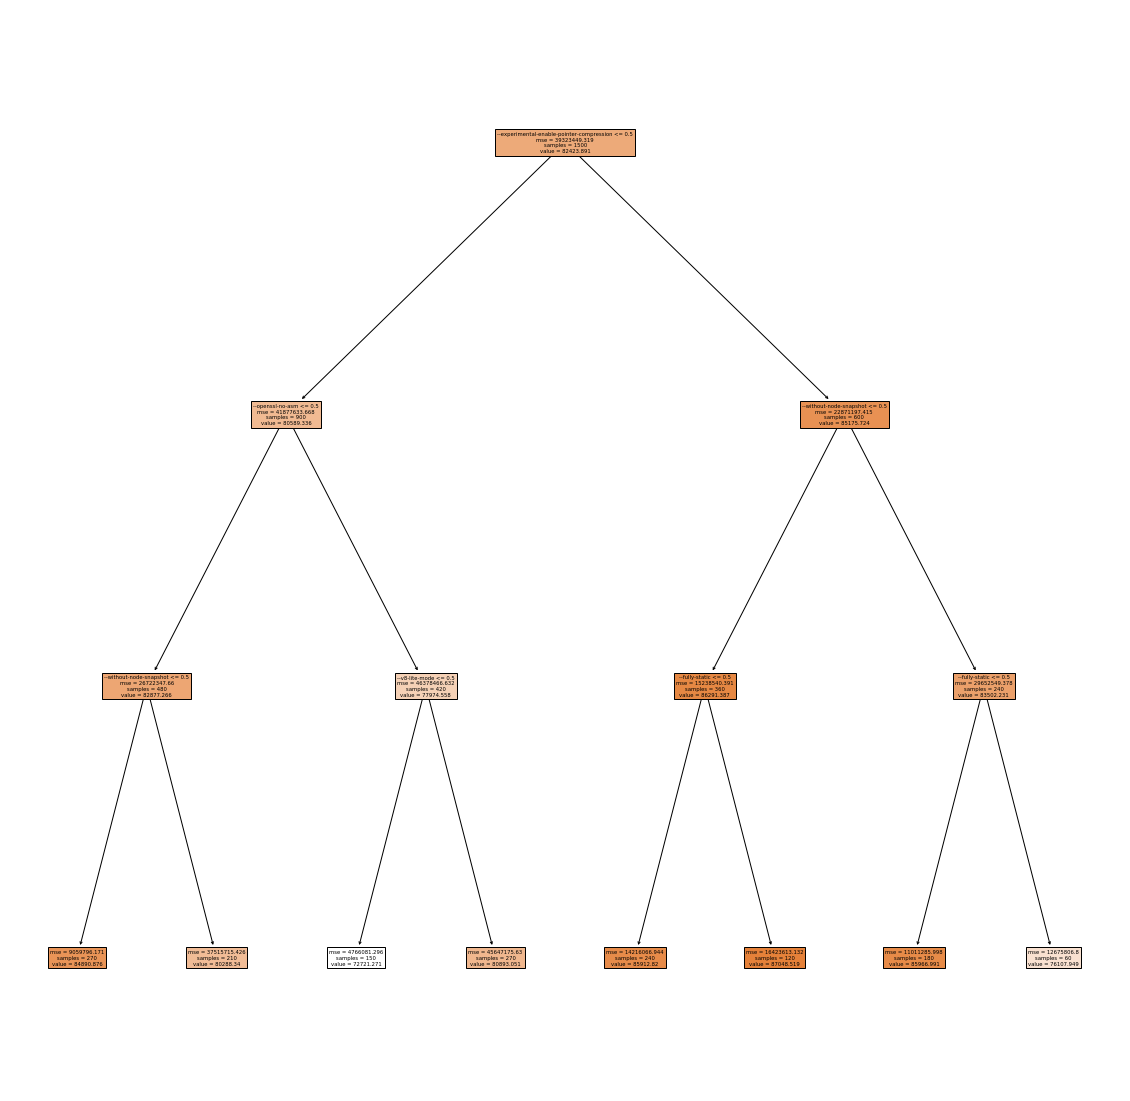

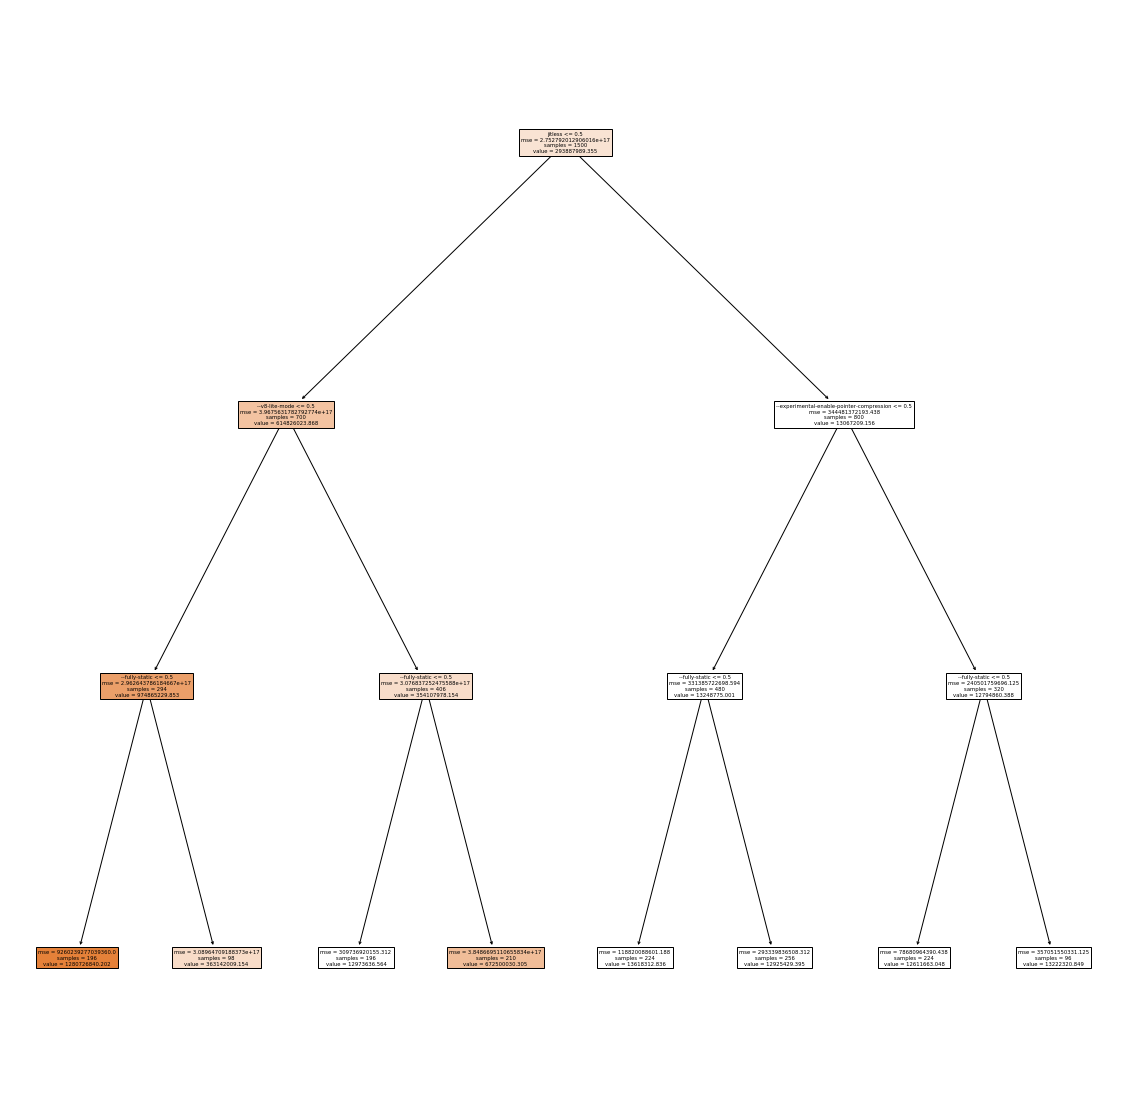

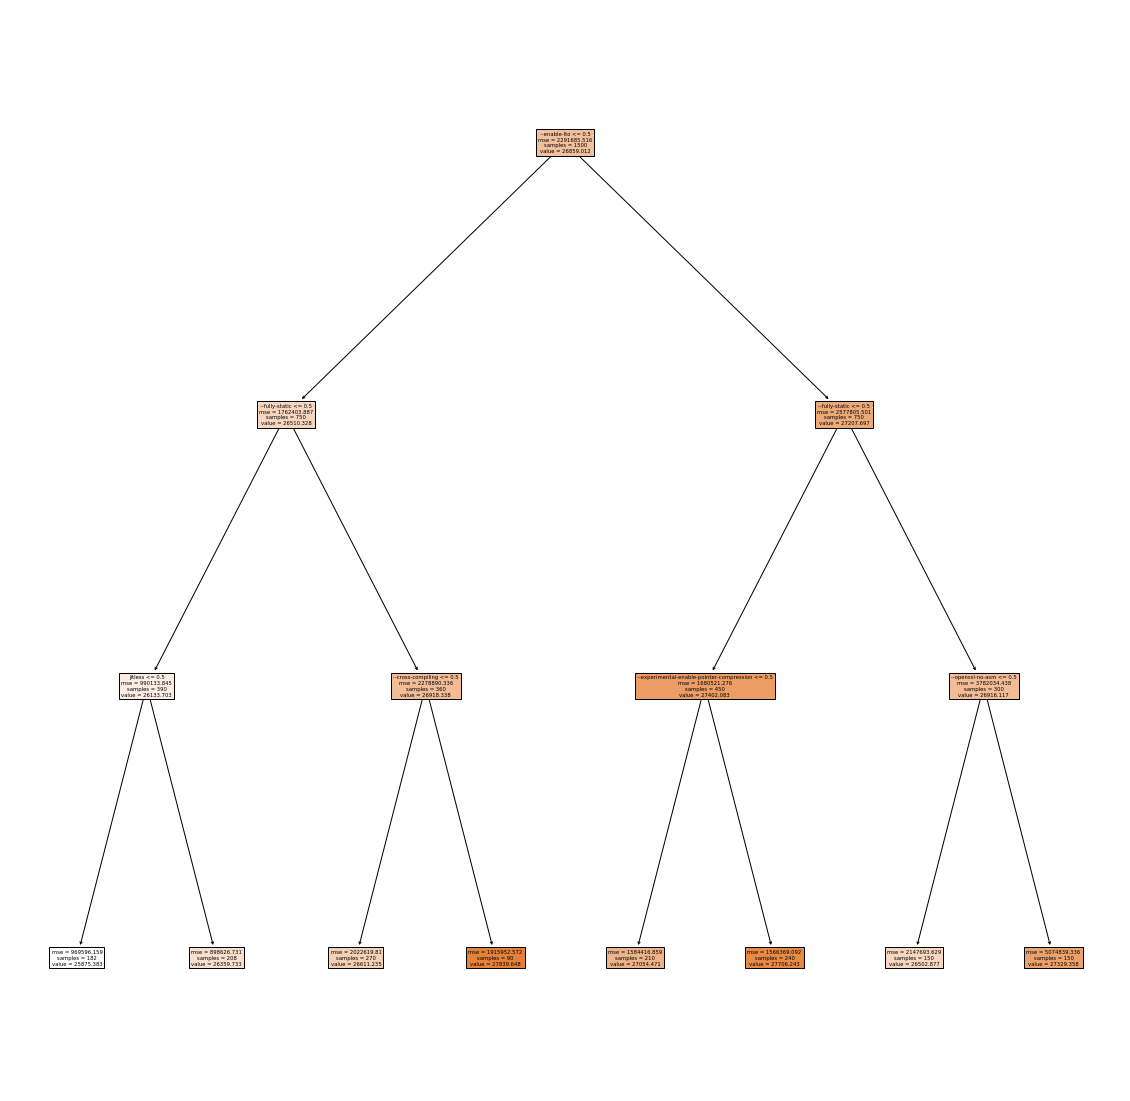

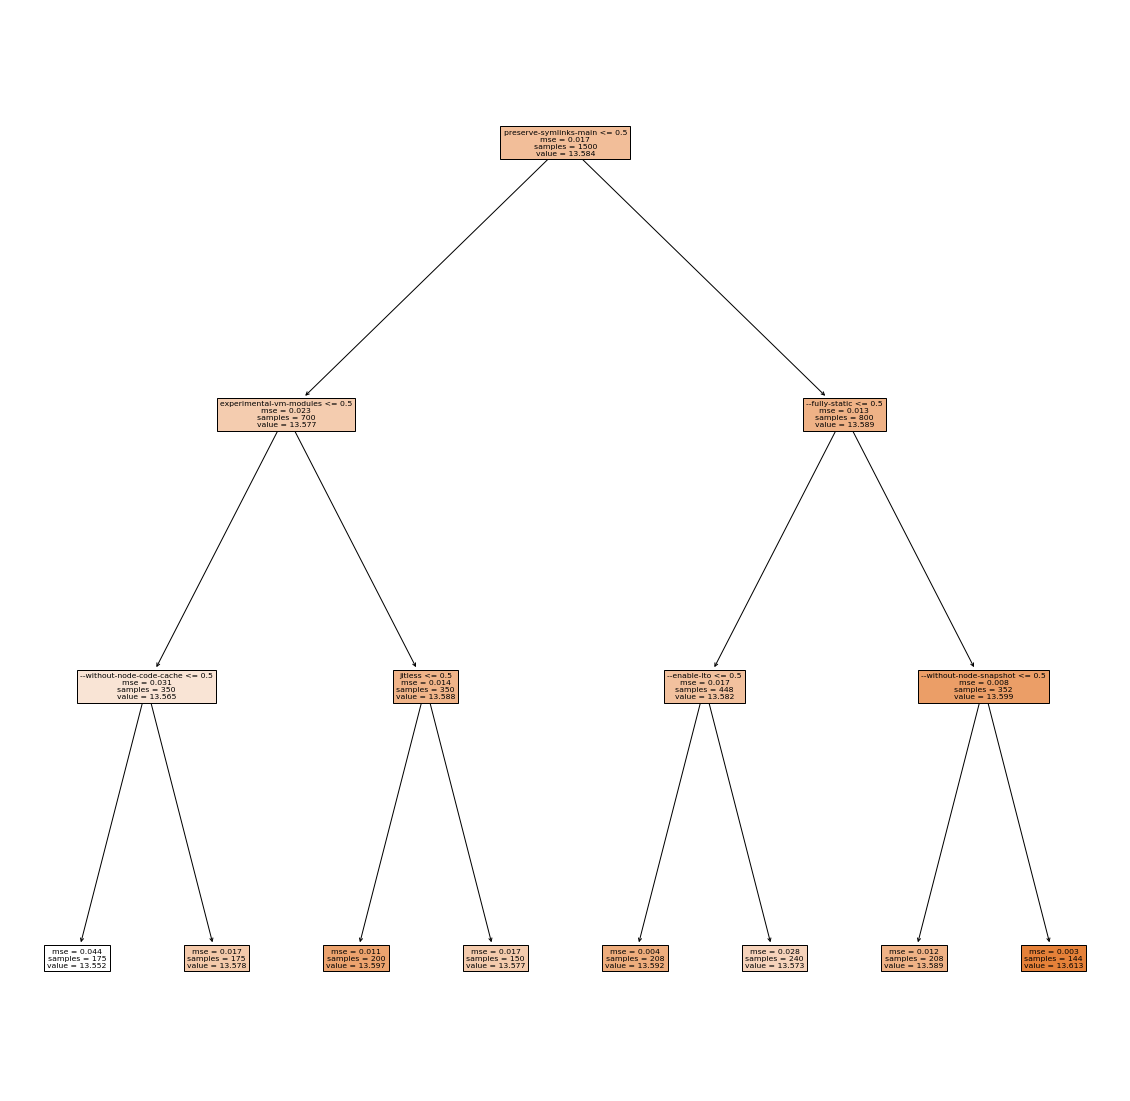

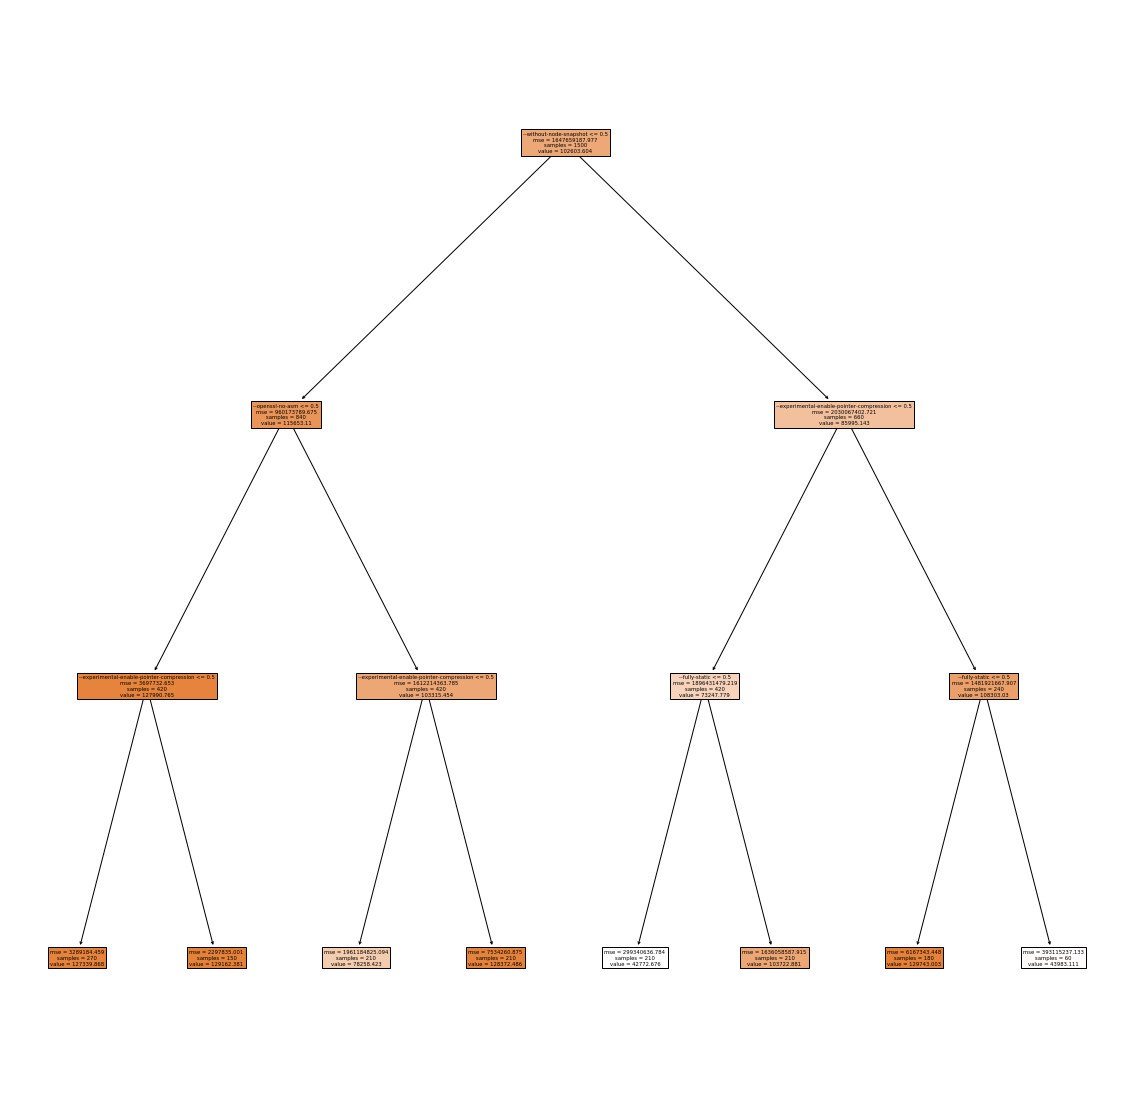

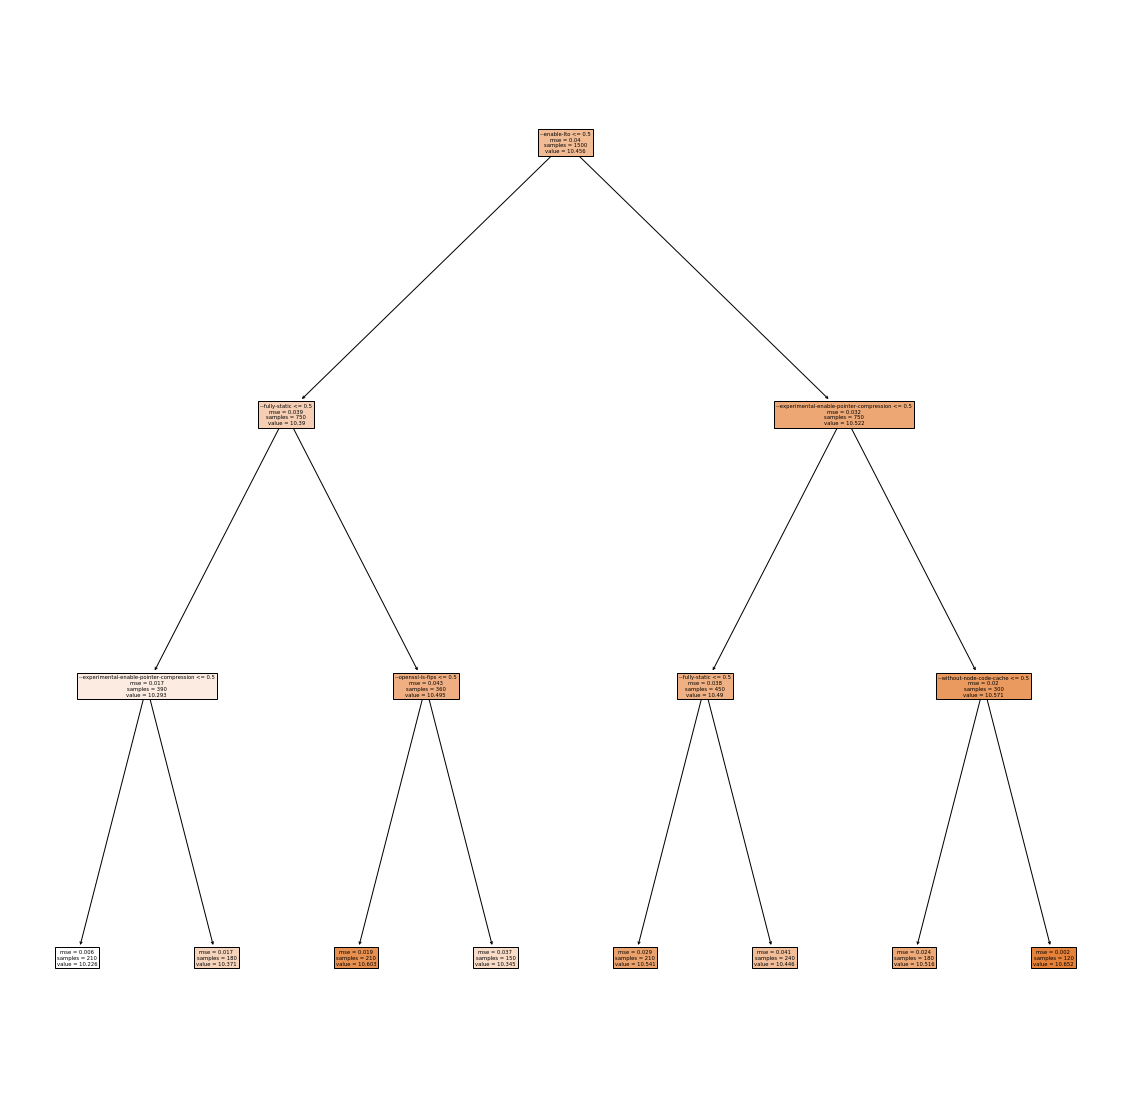

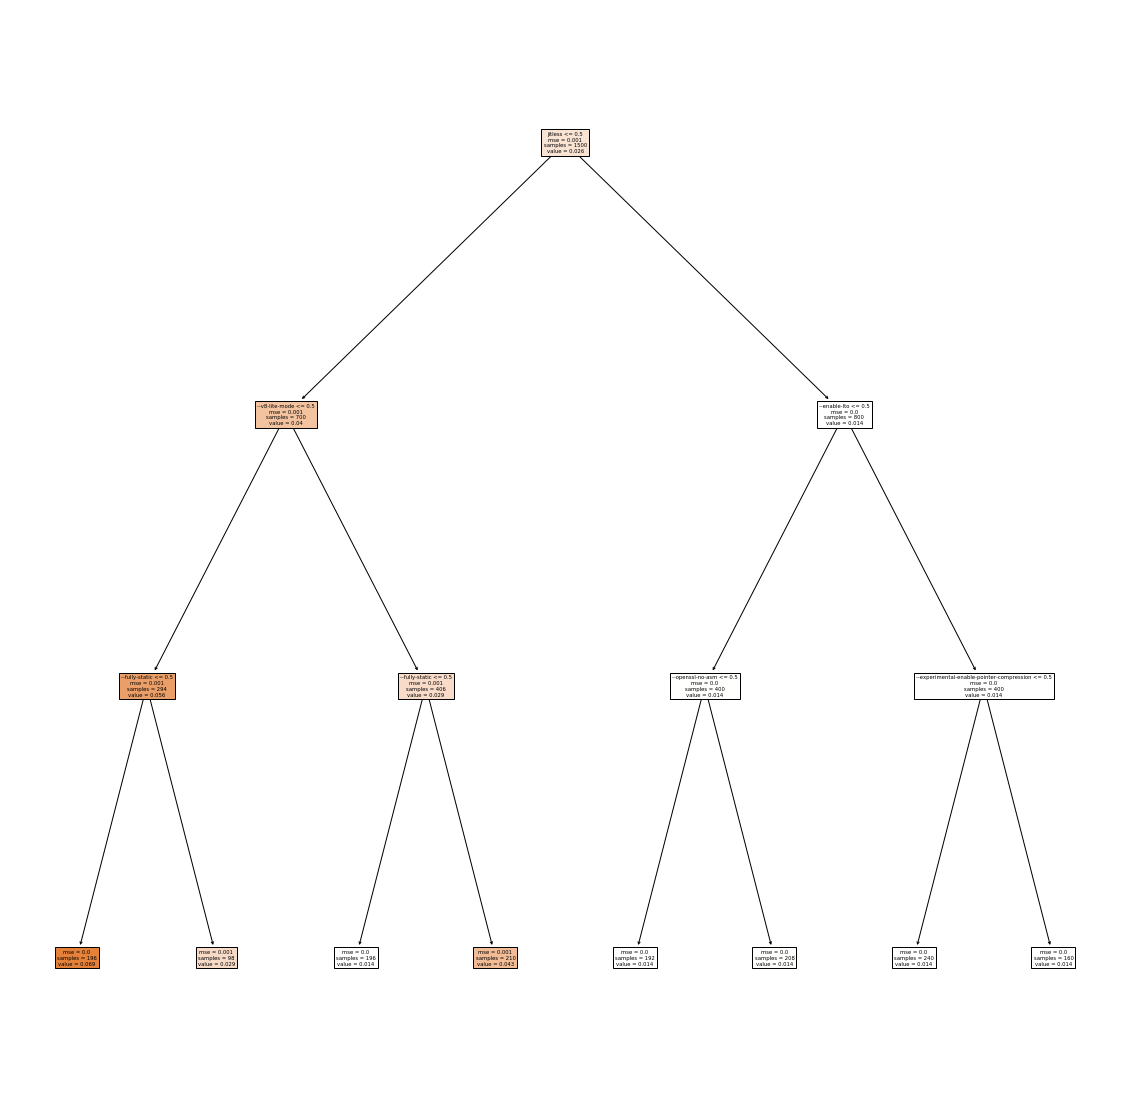

In [43]:
for i in range(len(inputs_name["nodejs"])):
    draw_tree("nodejs", i, "ops", 3)

### Feature importances

In [44]:
def show_imp(ns, input_index, dim, col_names=None, color=None):
    
    res_df = aggregate_data(ns, input_index, dim)

    y = res_df[dim]
    X = res_df.drop([dim], axis=1)

    rf = RandomForestRegressor()
    rf.fit(X,y)
    
    res_imp = pd.Series(rf.feature_importances_, res_df.columns[:-1])
    res_imp
    
    plt.figure(figsize = (20,10))
    plt.grid()
    plt.ylabel("Random Forest importance (%)", size = 25)
    plt.yticks(size=25)
    if color:
        plt.bar(range(len(res_imp.values)), 100*res_imp, color= color)
    else:
        plt.bar(range(len(res_imp.values)), 100*res_imp)
    if col_names:
        plt.xticks(range(len(res_imp.values)), col_names, rotation=45, size =25)
    else:
        plt.xticks(range(len(res_imp.values)), res_imp.index, rotation=45, size =25)
    plt.savefig("../results/"+ns+"/rf_input_"+str(input_index+1)+"_"+dim+".png")
    plt.show()

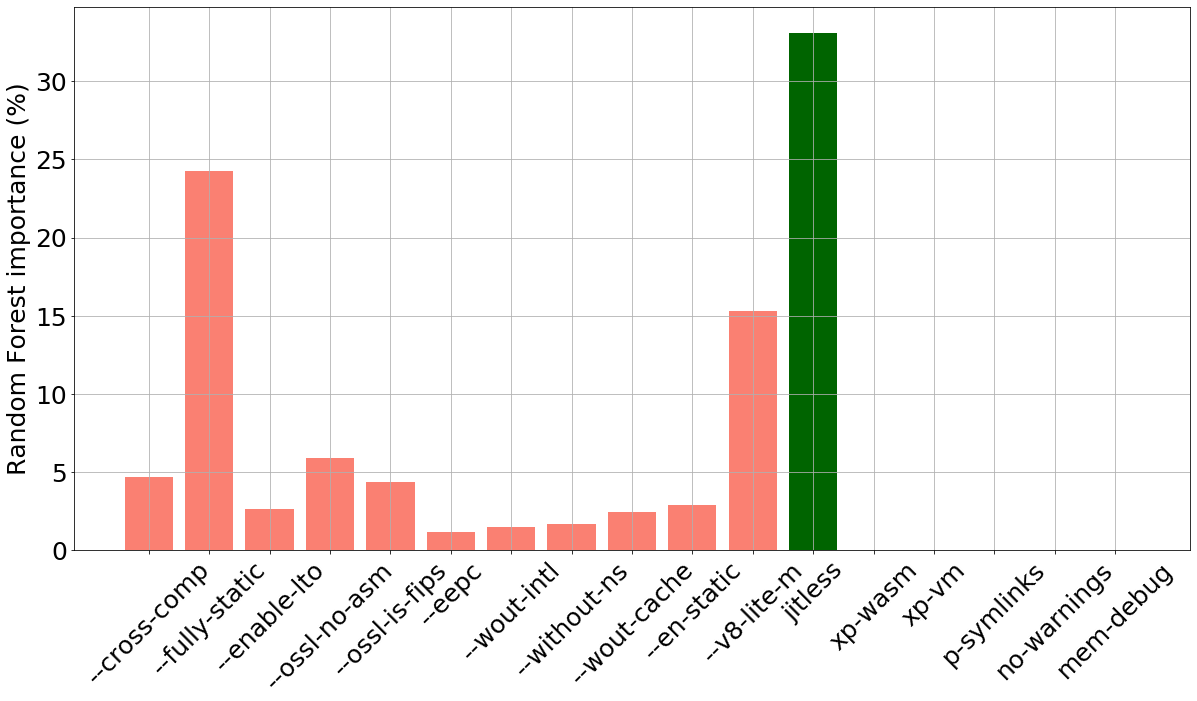

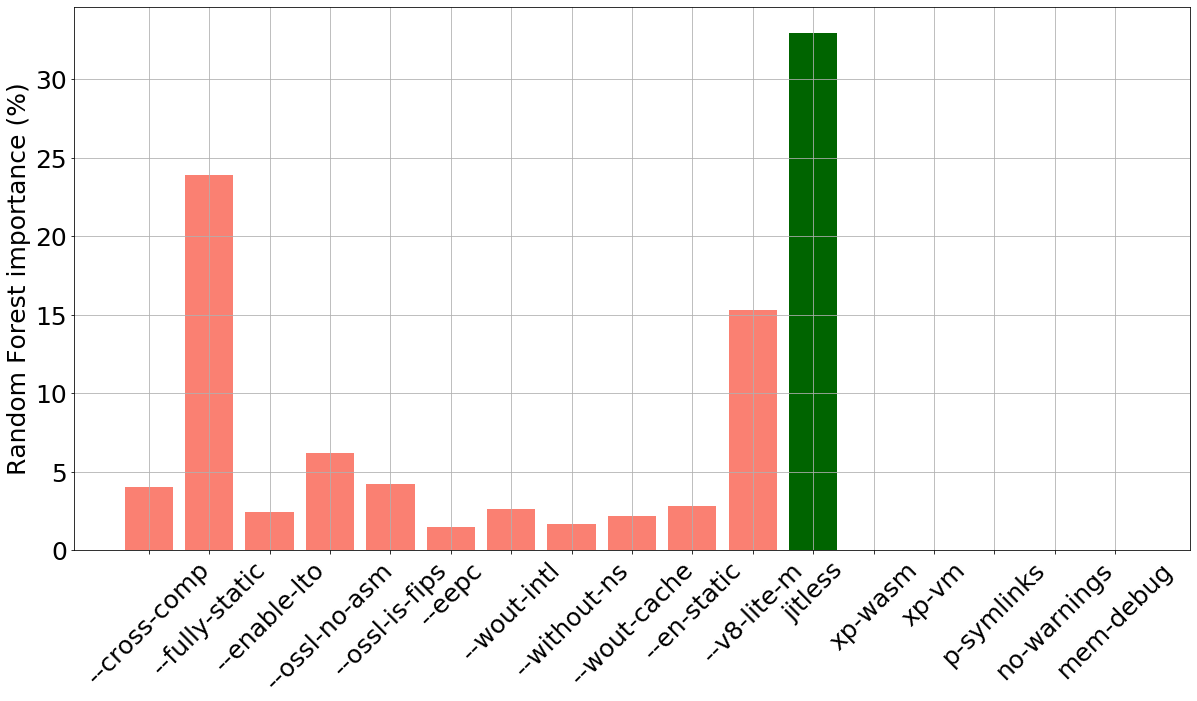

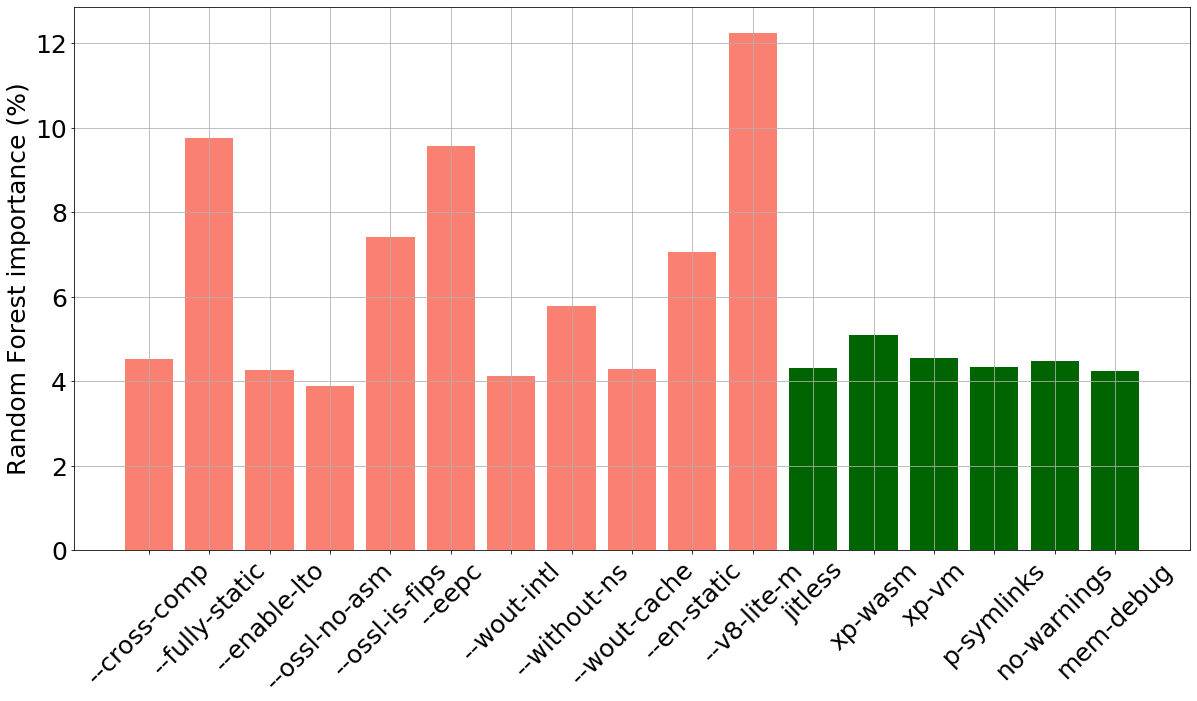

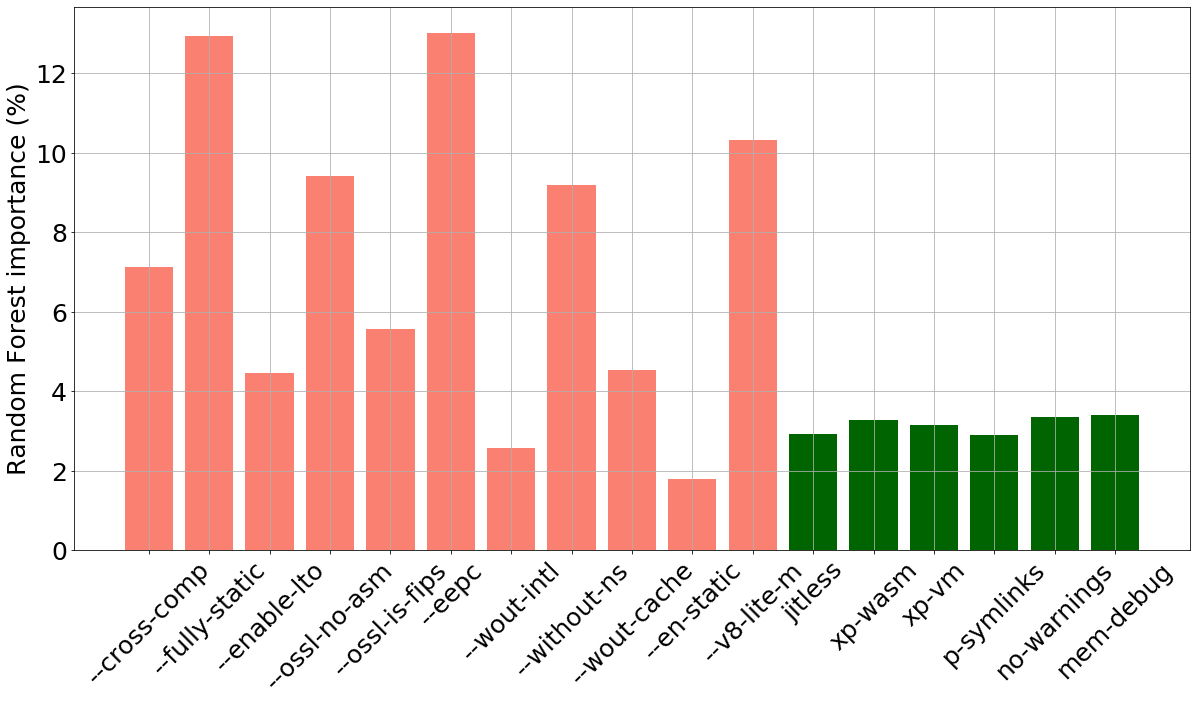

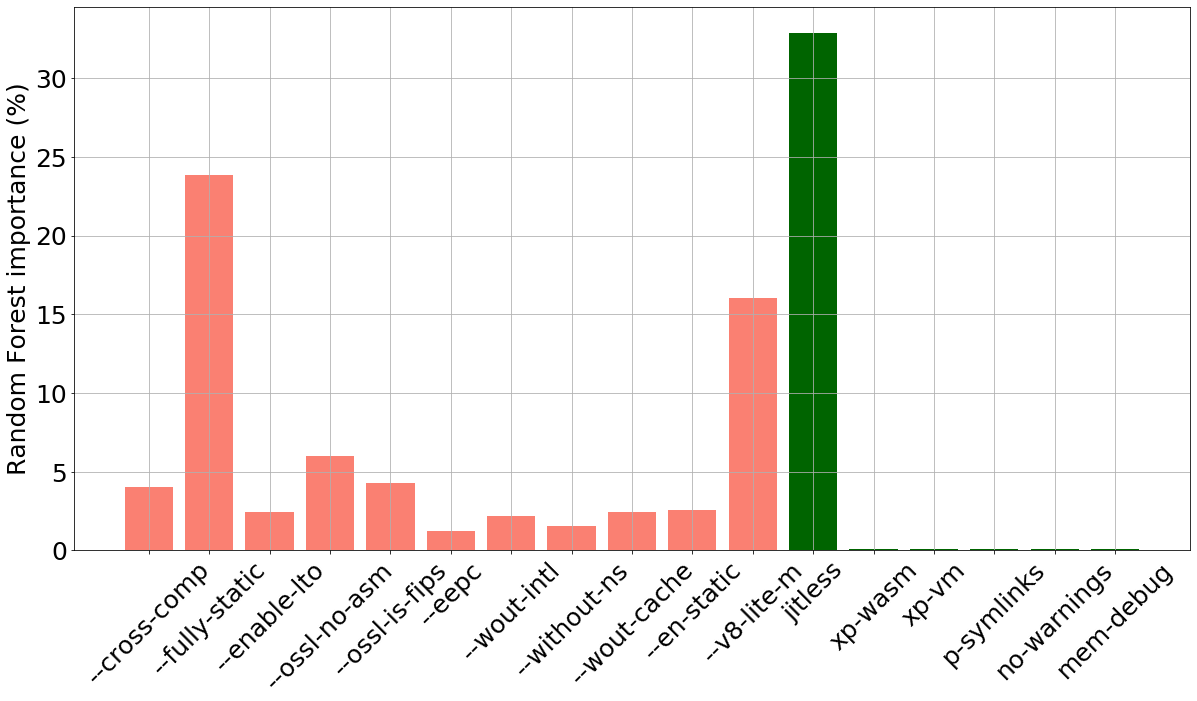

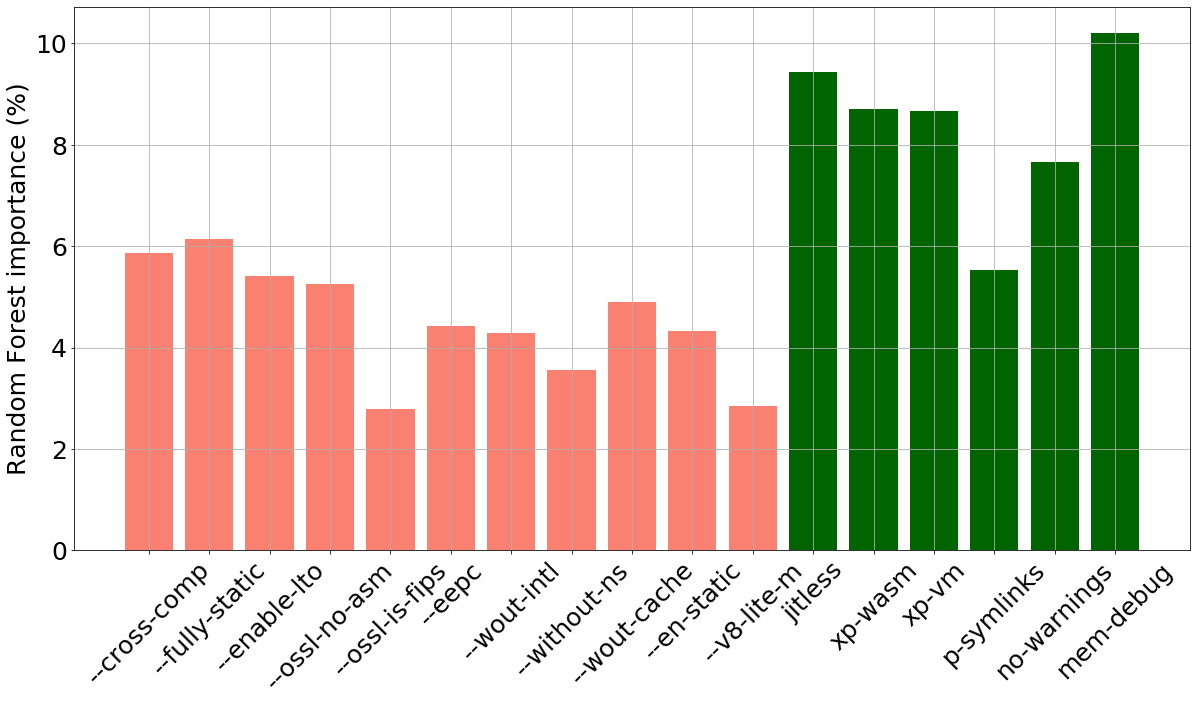

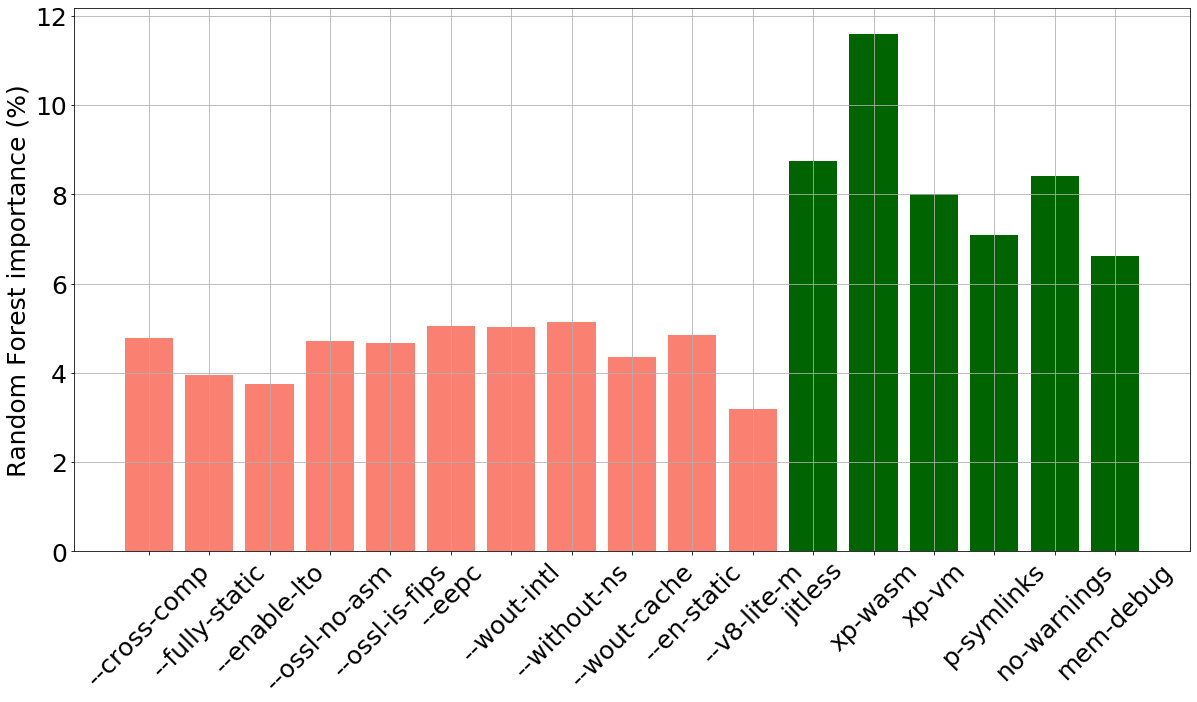

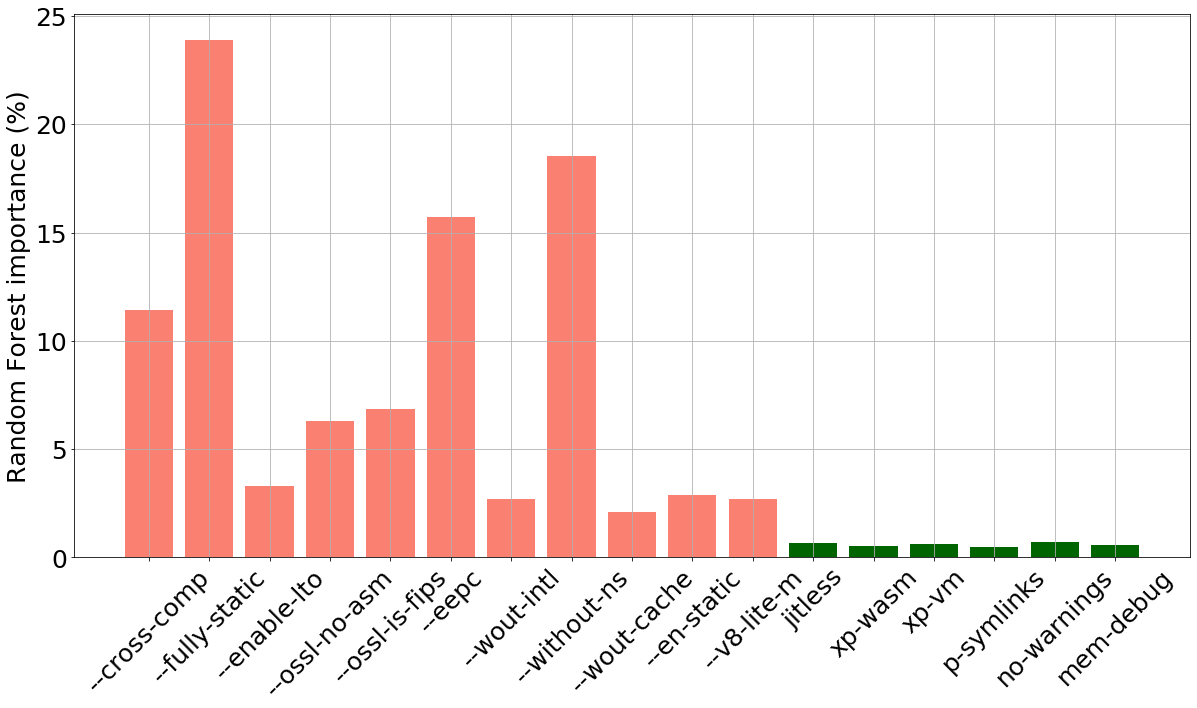

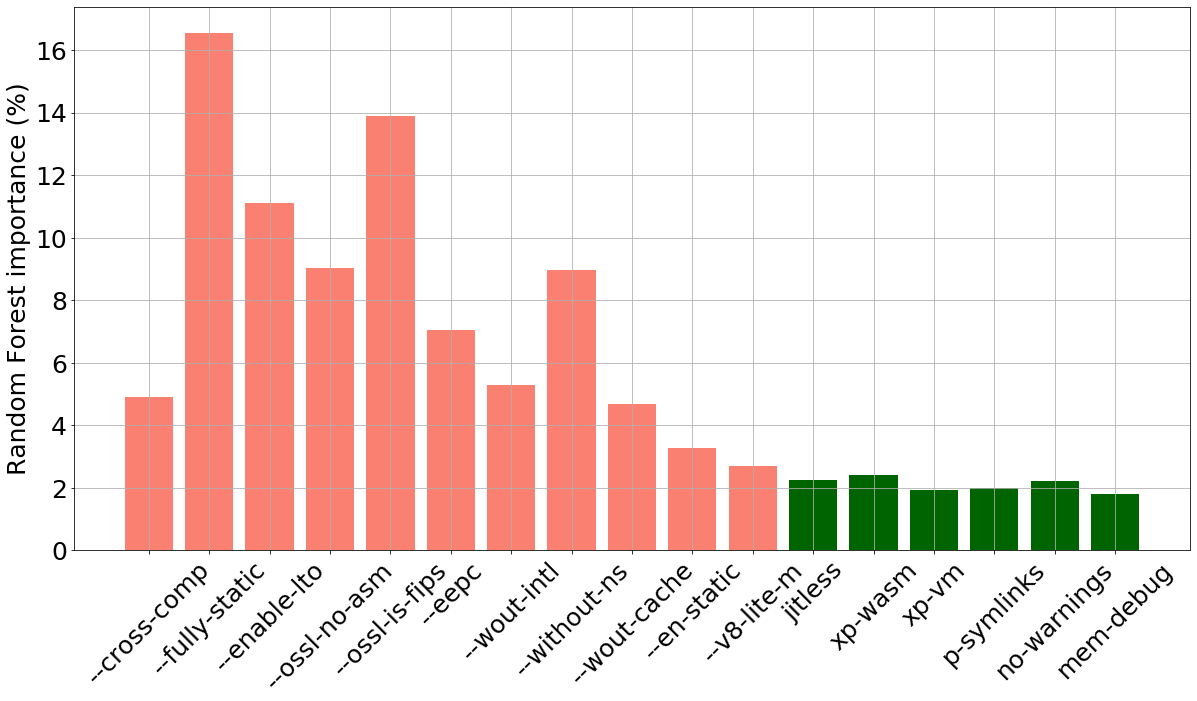

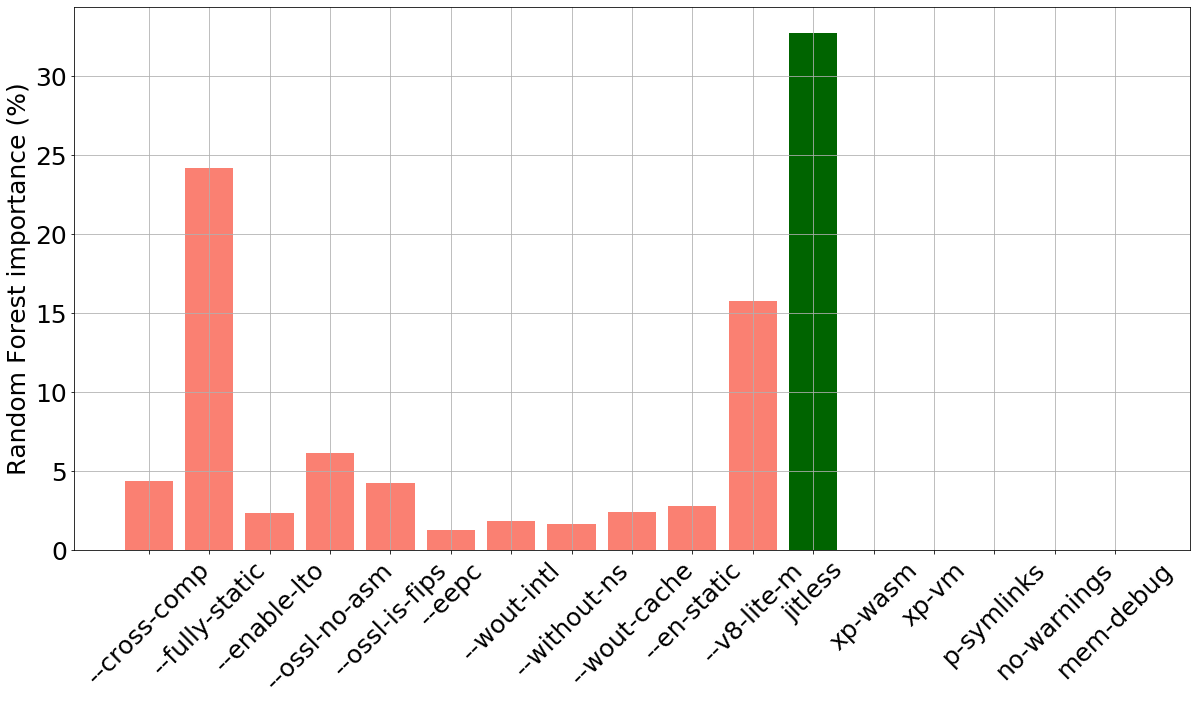

In [45]:
col_node = ['--cross-comp', '--fully-static', '--enable-lto',
       '--ossl-no-asm', '--ossl-is-fips',
       '--eepc', '--wout-intl',
       '--without-ns', '--wout-cache',
       '--en-static', '--v8-lite-m', 'jitless',
       'xp-wasm', 'xp-vm',
       'p-symlinks', 'no-warnings', 'mem-debug']

color = ["salmon"]*11+["darkgreen"]*6

for i in range(len(inputs_name["nodejs"])):
    show_imp("nodejs", i, "ops", col_node, color)

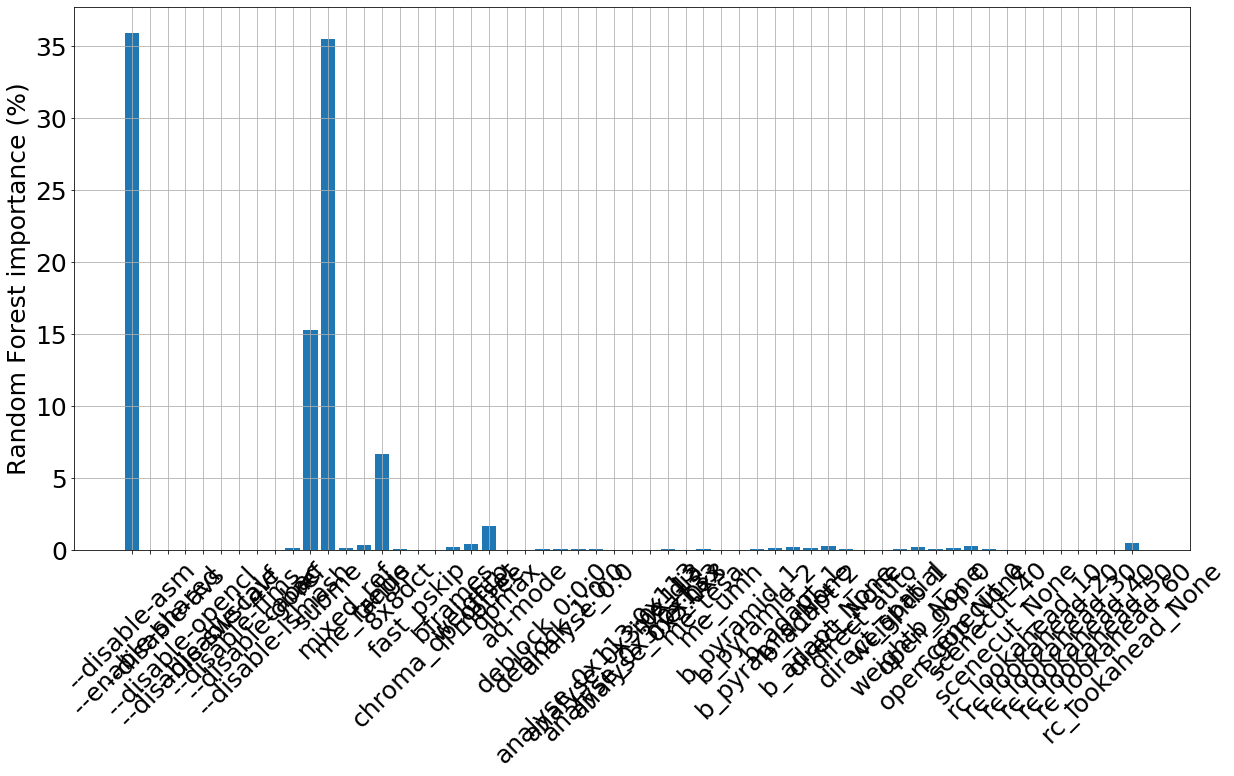

In [46]:
show_imp("x264", 1, "fps")

## With the feature interactions

In [47]:
def show_imp_interact(ns, input_index, dim):
    
    res_df = aggregate_data(ns, input_index, dim)

    y = res_df[dim]
    X = res_df.drop([dim], axis=1)
    
    poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = True)
    X_interact = pd.DataFrame(np.array(poly.fit_transform(X), int))

    rf = RandomForestRegressor()
    rf.fit(X_interact,y)
    
    names_interactions = [str(1)]

    xs = X.columns

    for f in xs:
        names_interactions.append(f)

    for i in range(len(xs)):
        first_f = xs[i]
        for j in range(len(xs)):
            sec_f = xs[j]
            if i ==j:
                names_interactions.append(first_f+"^2")
            else:
                if i <j:
                    names_interactions.append(first_f+" "+sec_f)
    
    names = poly.get_feature_names()
    
    res_imp = pd.Series(rf.feature_importances_, names_interactions)
    res_imp
    
    plt.figure(figsize = (20,10))
    plt.grid()
    plt.ylabel("Random Forest importance (%)", size = 25)
    plt.yticks(size=25)
    plt.bar(range(len(res_imp.values)), 100*res_imp)
    plt.xticks(range(len(res_imp.values)), res_imp.index, rotation=45, size =10)
    plt.savefig("../results/"+ns+"/rf_imp_interact_input_"+str(input_index+1)+"_"+dim+".png")
    plt.show()
    
    return res_imp

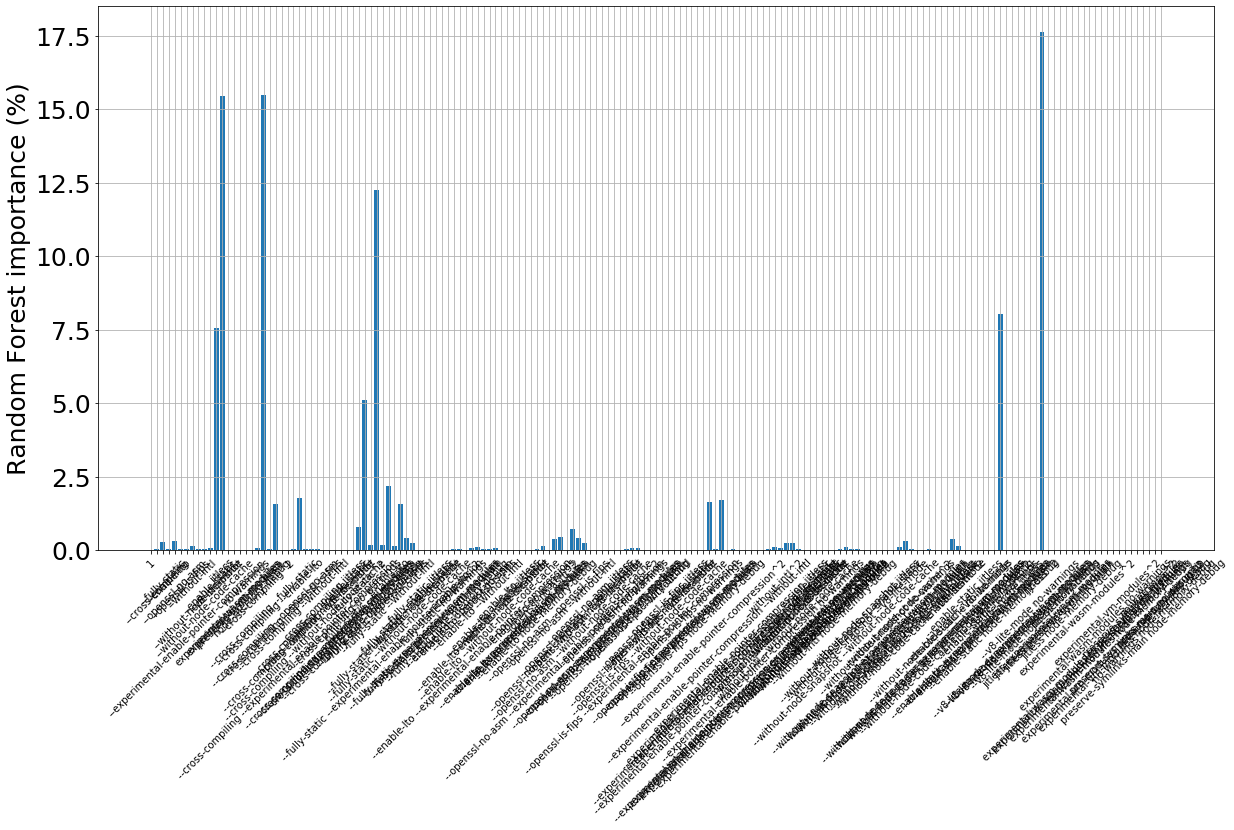

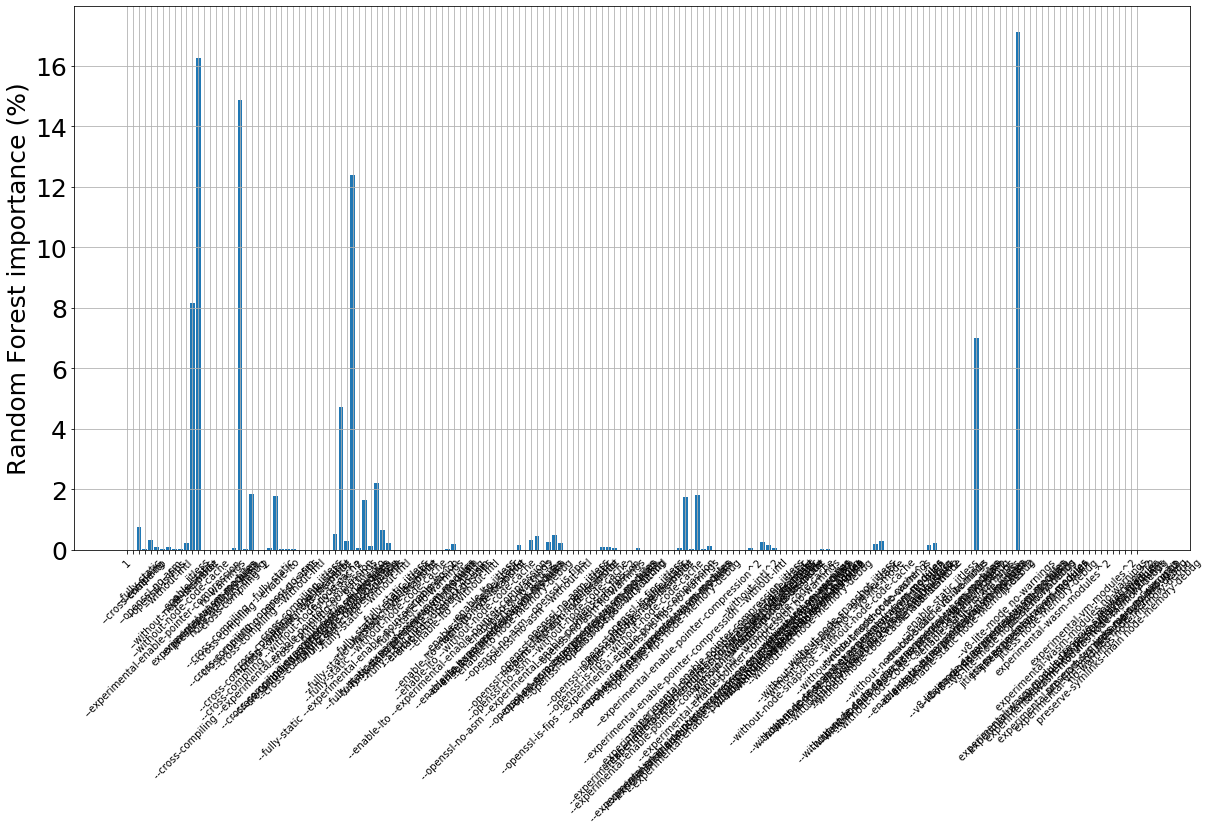

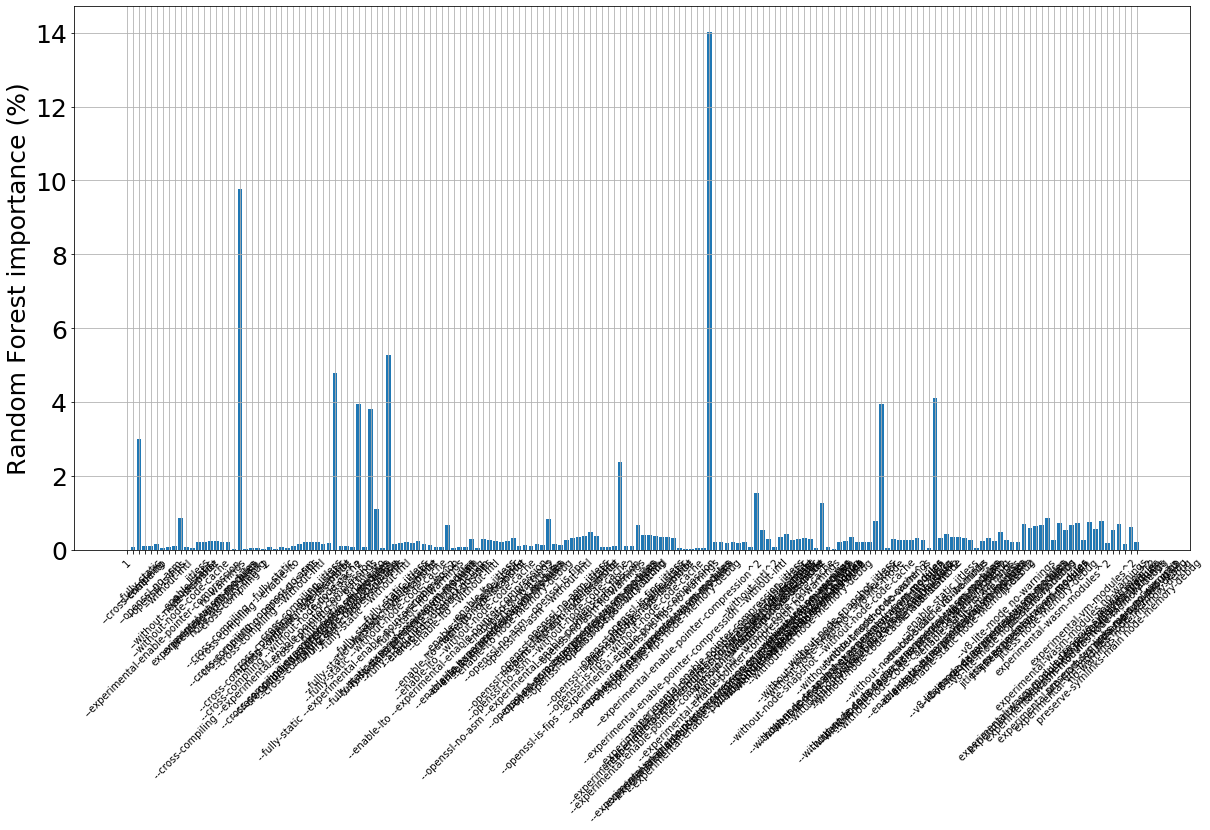

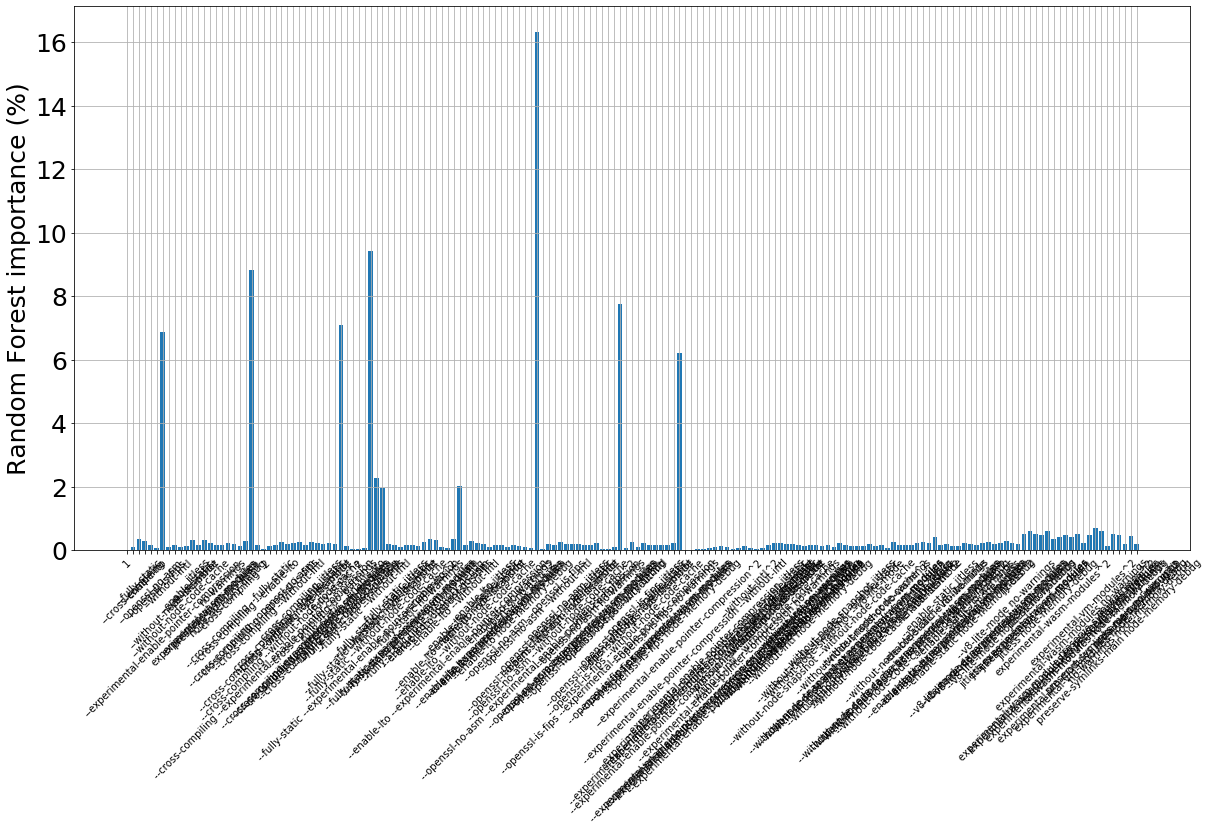

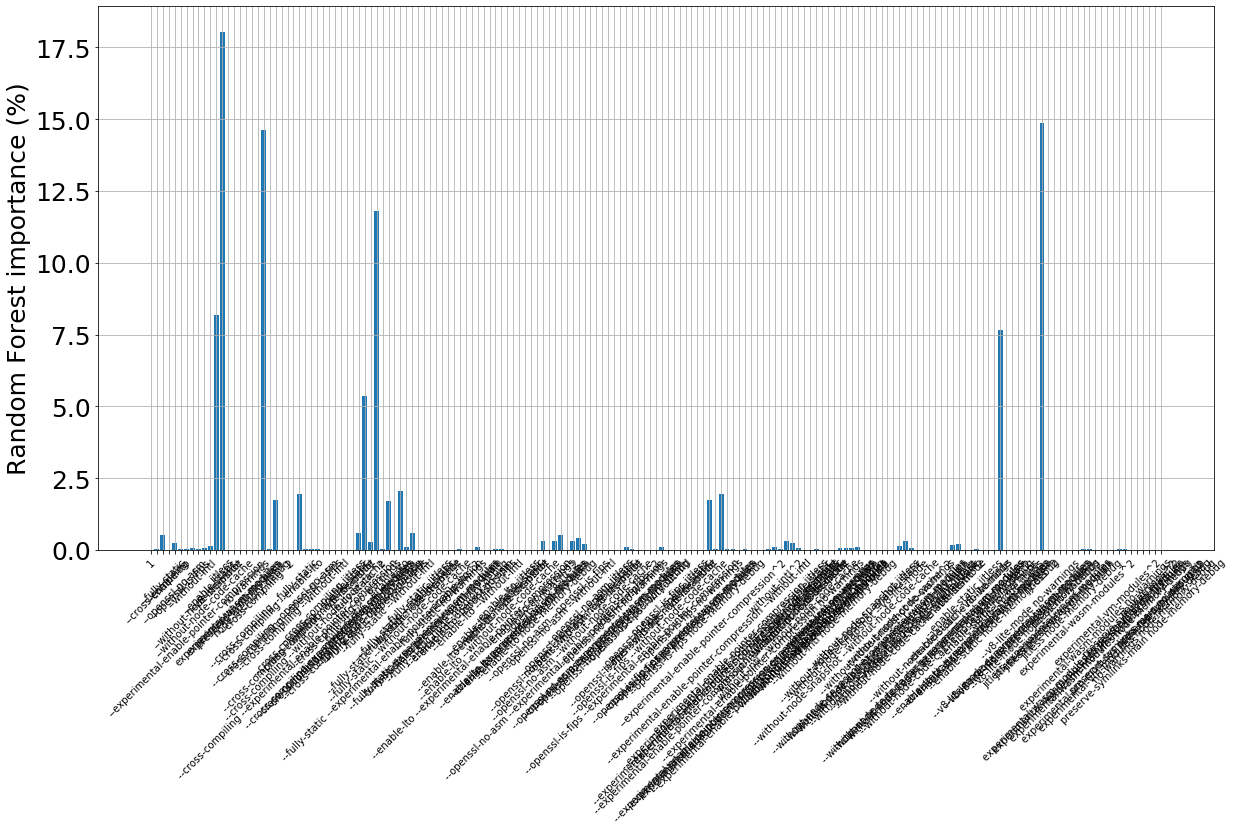

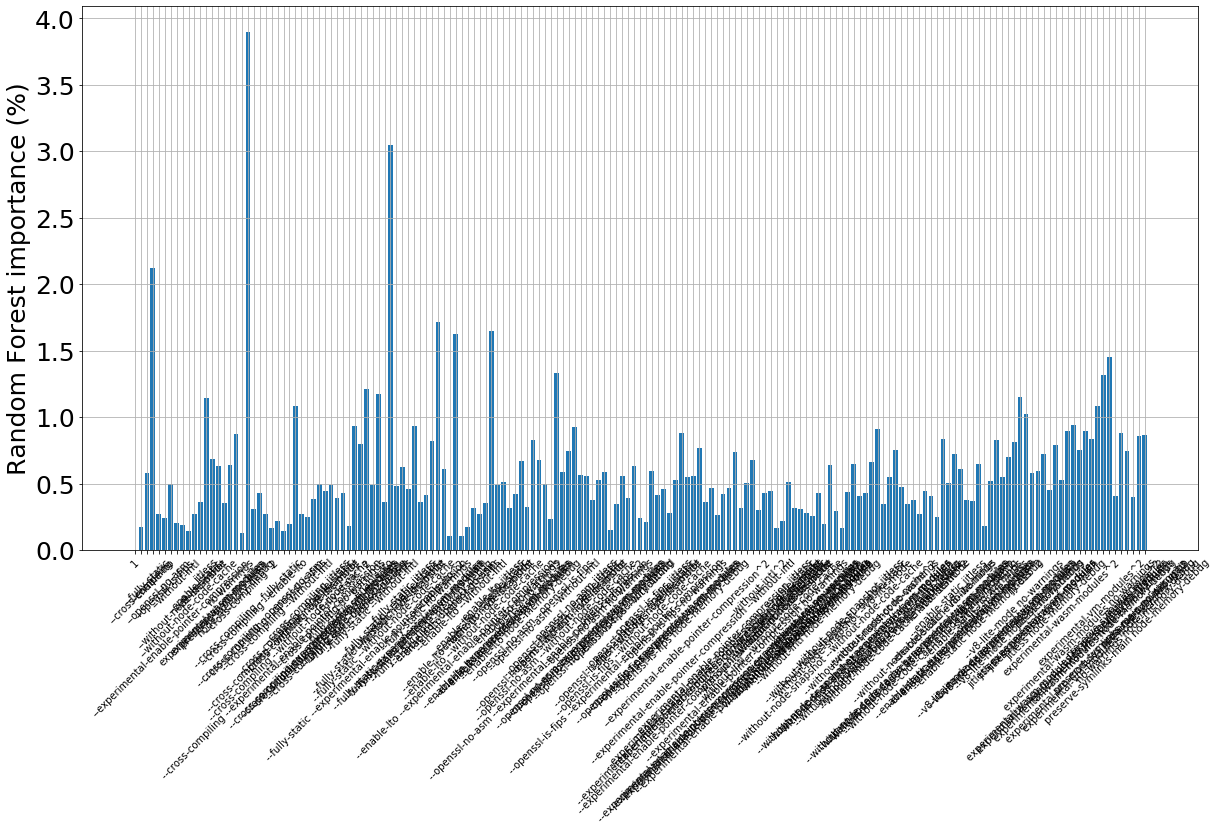

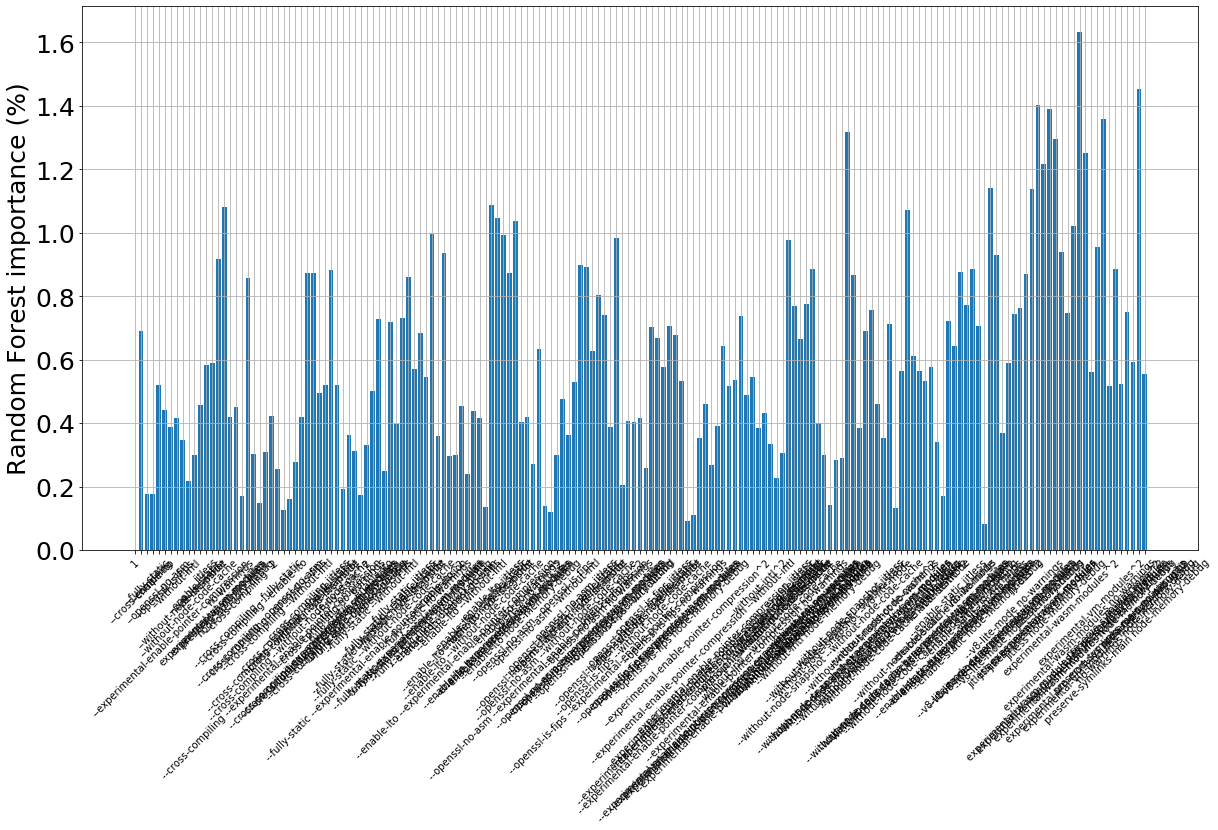

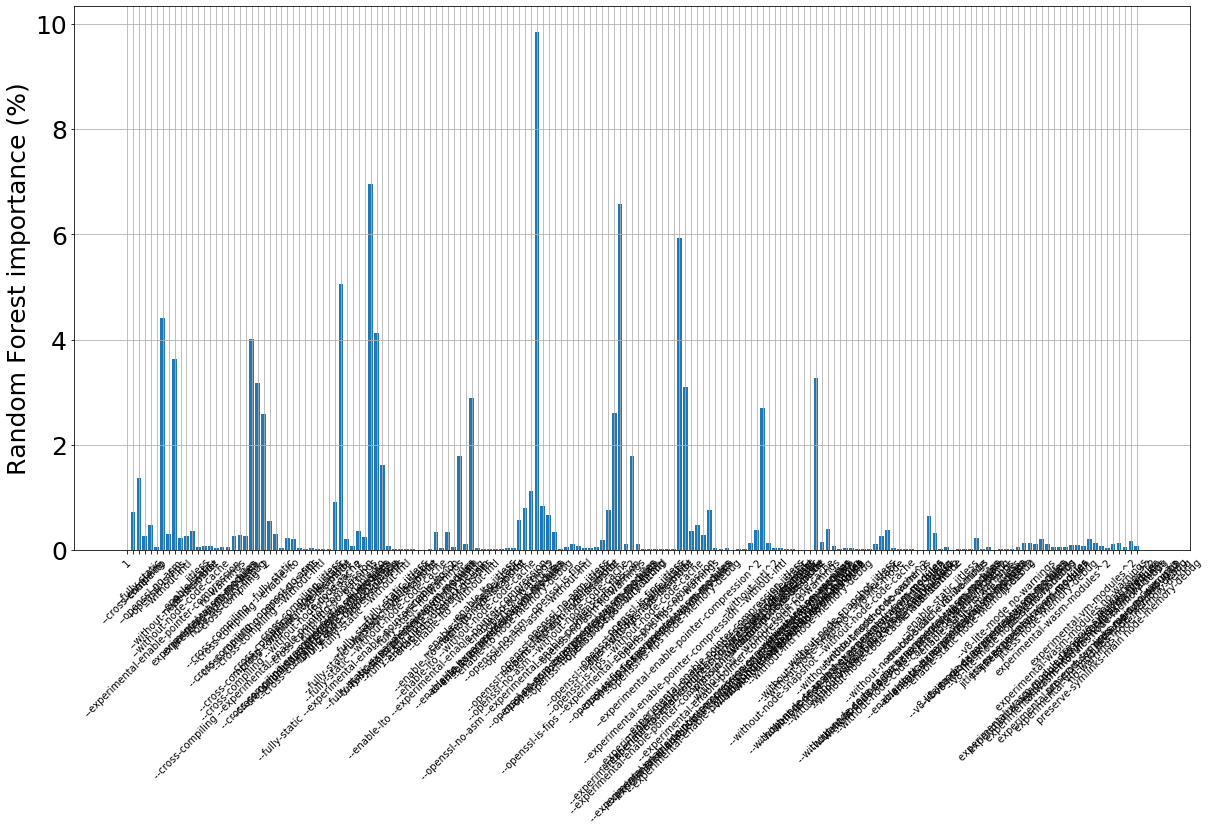

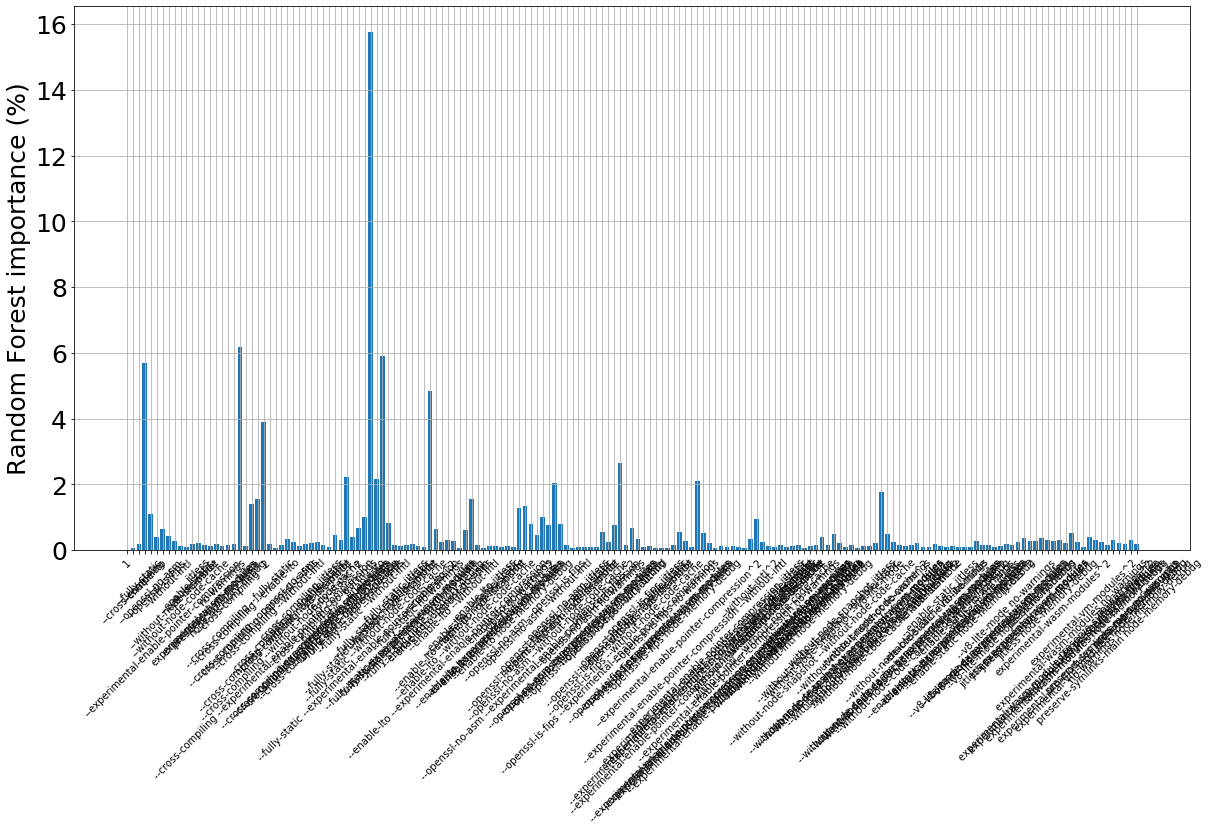

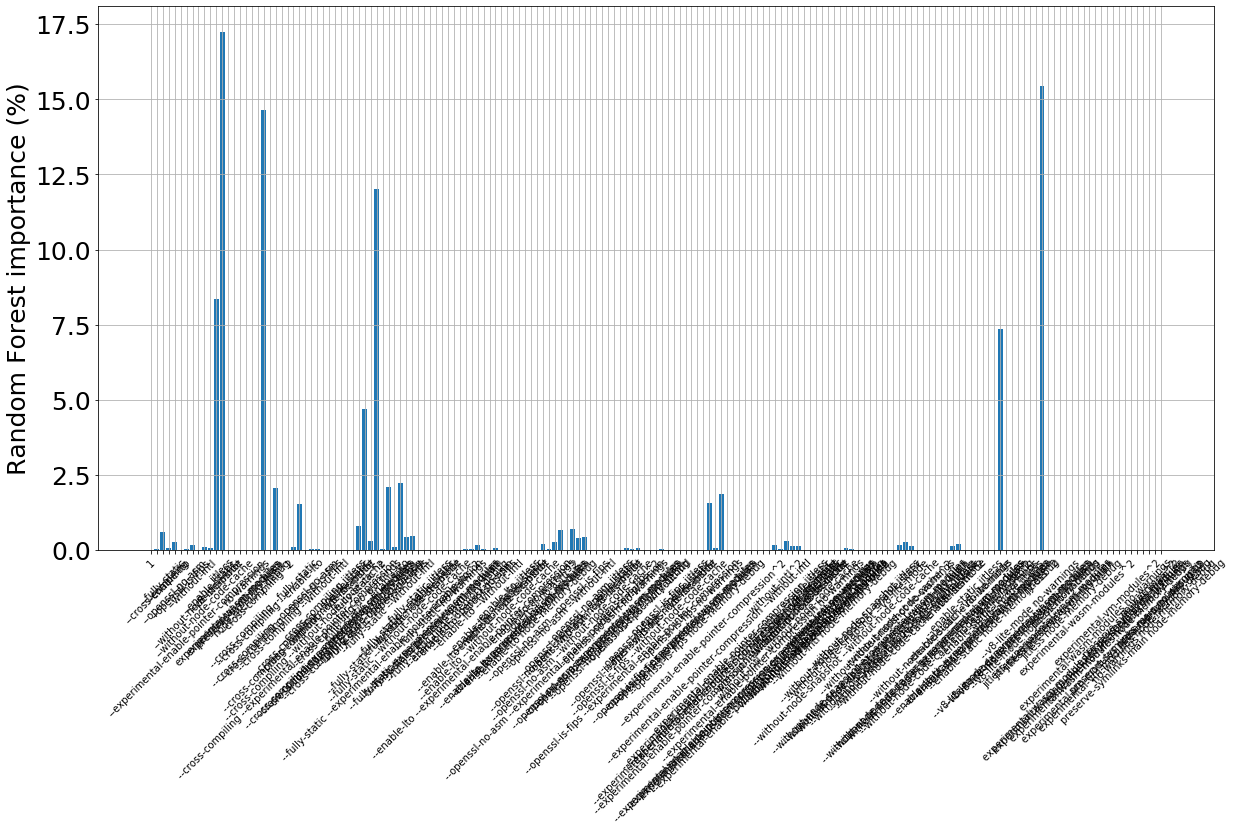

In [48]:
res_interact = dict()
for i in range(len(inputs_name["nodejs"])):
    res_interact[i+1]= show_imp_interact("nodejs", i, "ops")

In [49]:
res_interact[10].sort_values(ascending=True)[150:]

--openssl-no-asm --enable-static                                       0.004059
--openssl-no-asm --v8-lite-mode                                        0.004310
--fully-static --enable-static                                         0.004351
--fully-static --v8-lite-mode                                          0.004729
--fully-static                                                         0.005992
--openssl-no-asm --without-intl                                        0.006624
--openssl-no-asm --without-node-code-cache                             0.007036
--fully-static^2                                                       0.008060
--cross-compiling --without-node-snapshot                              0.015260
--experimental-enable-pointer-compression --without-intl               0.015607
--experimental-enable-pointer-compression --without-node-code-cache    0.018594
--cross-compiling --openssl-no-asm                                     0.020685
--fully-static --without-intl           

# RQ3

# RQ3.1

In [50]:
ns = "nodejs"
dim = "ops"

res_rq22 = dict()

# learning rates
lrs = [0.01, 0.05, 0.1]

for input_index in range(len(inputs_name[ns])):

    df = aggregate_data(ns, input_index, dim)

    perf_val = df.iloc[np.argmax(df[dim])][dim]

    val_default = default_data[ns, input_index][dim][0]

    res_rq22[input_index, "Oracle"] = perf_val/val_default
    
    print("Input="+str(input_index+1)+" : "+str(perf_val/val_default))

Input=1 : 1.0599309070713248
Input=2 : 1.09946844658139
Input=3 : 1.5045431351664464
Input=4 : 1.2505165944740293
Input=5 : 1.0069822499220096
Input=6 : 1.104064512317599
Input=7 : 0.9878912663316303
Input=8 : 1.054282891257011
Input=9 : 1.0391034905850076
Input=10 : 1.0443214896239967


In [51]:
for lr in lrs:
    
    for input_index in range(len(inputs_name[ns])):

        res_val = []
        res_val_def = []

        for i in range(10):

            df = aggregate_data(ns, input_index, dim)

            y = df[dim]
            X = df.drop([dim], axis=1)

            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = lr)

            rf = RandomForestRegressor()
            rf.fit(X_train, y_train)

            y_pred = rf.predict(X_test)

            if np.max(y_train) > np.max(y_pred):
                runtime_values = X_train.iloc[np.argmax(y_train)]
            else:
                runtime_values = X_test.iloc[np.argmax(y_pred)]

            perf_val = df.iloc[runtime_values.name][dim]

            res_default = default_data[ns, input_index]
            # [0] = default value, see the configuration csvs if you are not sure
            val_default = res_default[dim][0]
            val_mean = np.mean(res_default[dim])

            #res_default.columns = ['val'+str(k) for k in range(len(res_default.columns))]
            #for i in range(1,len(res_default.columns)-1):
            #    query_feature = "val"+str(i)+"=="+str(runtime_values[10+i])
            #    res_default = res_default.query(query_feature)


            res_val.append(perf_val/val_mean)
            res_val_def.append(perf_val/val_default)

        #print("Input " + str(input_index) +" : "+ str(np.mean(res_val)))
        res_rq22[input_index, str(lr)] = np.mean(res_val_def)

In [52]:
lrs2 = [str(lr) for lr in lrs]
lrs2.append("Oracle")
print("\\begin{table}[htb]")
print("\\begin{tabular}{|c|c|c|c|c|}")
print("\\hline")
print("Training Size")
for lr in lrs2:
    print("& "+lr)
print("\\\\ \\hline")
for input_index in range(10):
    print("$\mathcal{I}$\\#"+str(input_index+1))
    for lr in lrs2:
        print("& "+str(np.round(res_rq22[input_index,lr],3)))
    print("\\\\ \\hline")
print("\\end{tabular}")
print("\\label{tab:cross-tuning}")
print("\\caption{Performance ratios between the best predicted configuration and the default configuration}")
print("\\end{table}")

\begin{table}[htb]
\begin{tabular}{|c|c|c|c|c|}
\hline
Training Size
& 0.01
& 0.05
& 0.1
& Oracle
\\ \hline
$\mathcal{I}$\#1
& 1.013
& 1.034
& 1.035
& 1.06
\\ \hline
$\mathcal{I}$\#2
& 0.972
& 1.087
& 1.09
& 1.099
\\ \hline
$\mathcal{I}$\#3
& 1.229
& 1.36
& 1.382
& 1.505
\\ \hline
$\mathcal{I}$\#4
& 1.112
& 1.227
& 1.228
& 1.251
\\ \hline
$\mathcal{I}$\#5
& 0.964
& 1.003
& 1.005
& 1.007
\\ \hline
$\mathcal{I}$\#6
& 1.002
& 1.05
& 1.089
& 1.104
\\ \hline
$\mathcal{I}$\#7
& 0.986
& 0.987
& 0.987
& 0.988
\\ \hline
$\mathcal{I}$\#8
& 1.031
& 1.048
& 1.049
& 1.054
\\ \hline
$\mathcal{I}$\#9
& 1.034
& 1.037
& 1.038
& 1.039
\\ \hline
$\mathcal{I}$\#10
& 0.999
& 1.018
& 1.02
& 1.044
\\ \hline
\end{tabular}
\label{tab:cross-tuning}
\caption{Performance ratios between the best predicted configuration and the default configuration}
\end{table}


# RQ3.2.

In [137]:
data_dir = "../data/"
name_systems = ["x264", "xz", "poppler", "nodejs"]

data = dict()
inputs_name = dict()

perfs = dict()

perfs["nodejs"] = ["ops"]
perfs["poppler"] = ["time", "size"]
perfs["x264"] = ["kbs", "fps", "size", "time"]
perfs["xz"] = ["time", "size"]

for ns in name_systems:
    
    data_path = data_dir+ns+'/'
    
    list_dir = os.listdir(data_path)
    list_dir.remove('ctime_options.csv')
    list_dir.remove('default')

    inputs_name[ns] = os.listdir(data_path+list_dir[0])
    inputs = inputs_name[ns]
    
    for j in range(len(inputs)):
        for i in range(len(list_dir)):
            loc = data_path+list_dir[i]+'/'+inputs[j]
            df = pd.read_csv(loc)
            df_modif = pd.get_dummies(df.drop(perfs[ns], axis = 1))
            for p in perfs[ns]:
                df_modif[p]=df[p]
            data[ns, list_dir[i], j] = df_modif

In [138]:
data['x264', '12', 0]

configurationID  cabac  ref  subme  mixed_ref  me_range  trellis  8x8dct  \
0                  1      0    1      0          0        16        0       0   
1                  2      1    1      1          0        16        0       1   
2                 11      0    1      2          0        16        0       0   
3                101      1    2      6          1        16        1       1   
4                102      1    2      6          1        16        1       1   
..               ...    ...  ...    ...        ...       ...      ...     ...   
196               96      1    2      8          0        16        0       1   
197               97      1    2      4          1        16        0       1   
198               98      1    2      4          0        24        0       1   
199               99      1    5      6          1        16        1       1   
200              100      0    3      6          1        16        1       1   

     fast_pskip  chroma_qp_offset  ...  rc_lookahead_20  rc_lookahead_30  \
0             1                 0  ...                0                0   
1             1                 0  ...                0                0   
2             1                 0  ...                0                0   
3             1                 0  ...                0                0   
4             1                 0  ...                0                0   
..          ...               ...  ...              ...              ...   
196           1                 0  ...                1                0   
197           1                 0  ...                1                0   
198           1                 0  ...                0                1   
199           0                -2  ...                0                1   
200           1                -2  ...                0                1   

     rc_lookahead_40  rc_lookahead_50  rc_lookahead_60  rc_lookahead_None  \
0                  0                0                0                  1   
1                  0                0                0                  1   
2                  0                0                0                  1   
3                  0                0                1                  0   
4                  0                0                0                  0   
..               ...              ...              ...                ...   
196                0                0                0                  0   
197                0                0                0                  0   
198                0                0                0                  0   
199                0                0                0                  0   
200                0                0                0                  0   

         kbs      fps      size    time  
0    4183.52  1135.55  10458804   2.351  
1    3477.46   563.54   8693658   4.815  
2    3169.17   792.76   7922913   3.499  
3    2623.96   202.74   6559905  12.106  
4    3259.57   231.14   8148915  12.605  
..       ...      ...       ...     ...  
196  2585.39   220.60   6463472  13.880  
197  2357.55   195.67   5893872   9.242  
198  2386.93   318.79   5967323   7.085  
199  2992.60   202.23   7481509  15.626  
200  4200.12   212.49  10500300  16.260  

[201 rows x 54 columns]

In [260]:
def p1(ns, input_index, dim, budget, cost = "time"):
    
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    ctime_data = pd.read_csv(data_dir+ns+"/ctime_options.csv")
    
    # we delete the other perfs to avoid ocnsidering them as predicting variables
    to_delete_perfs = list(perfs[ns])
    to_delete_perfs.remove(dim)
    to_delete_perfs.append('configurationID')
    
    if cost == "time":
        budget = min(budget, 0.95*np.sum(aggregate_data(ns, input_index, 'time')['time']))
    else:
        budget = min(budget, int(0.95*aggregate_data(ns, input_index, perfs[ns][0]).shape[0]))
    
    s = []
    aggreg_vals = []
    
    while budget > 0:
        
        comp_id = np.random.randint(0, nb_ctime)
        
        df_runtime = data[ns, str(comp_id+1), input_index].drop(to_delete_perfs, axis = 1)
        
        rt_id = np.random.randint(0, df_runtime.shape[0])
        
        if (comp_id, rt_id) not in s:
            
            #print(data[ns, str(comp_id+1), input_index].iloc[rt_id])
            
            if cost == "time":
                budget-= data[ns, str(comp_id+1), input_index].iloc[rt_id]['time']
            else:
                budget-=1
            
            s.append((comp_id, rt_id))
            
            aggreg_vals.append(list(tuple(ctime_data.iloc[comp_id][1:]) + tuple(df_runtime.loc[rt_id])))
        
    res_df = pd.DataFrame(aggreg_vals)
    res_df.columns = list(tuple(ctime_data.columns[1:]) + tuple(df_runtime.columns))
    
    return res_df

In [261]:
p1('x264', 0, "kbs", 200000)

--disable-asm  --enable-shared   --disable-avs   --disable-opencl   \
0                 1                 1               0                  1   
1                 1                 1               0                  1   
2                 0                 1               0                  1   
3                 0                 1               1                  0   
4                 1                 1               1                  1   
...             ...               ...             ...                ...   
1508              0                 0               0                  1   
1509              0                 0               0                  1   
1510              1                 0               0                  1   
1511              0                 1               1                  0   
1512              1                 0               1                  1   

      --disable-swscale   --disable-lavf   --disable-ffms   --disable-gpac   \
0                      0                1                0                1   
1                      0                0                1                1   
2                      0                0                0                0   
3                      0                1                1                1   
4                      0                1                1                0   
...                  ...              ...              ...              ...   
1508                   0                1                1                1   
1509                   0                1                0                1   
1510                   0                1                0                1   
1511                   0                1                1                1   
1512                   0                0                1                0   

      --disable-lsmash  cabac  ...  scenecut_40  scenecut_None  \
0                    1    1.0  ...          1.0            0.0   
1                    0    0.0  ...          0.0            0.0   
2                    0    1.0  ...          1.0            0.0   
3                    1    0.0  ...          1.0            0.0   
4                    0    1.0  ...          0.0            0.0   
...                ...    ...  ...          ...            ...   
1508                 0    1.0  ...          1.0            0.0   
1509                 1    1.0  ...          1.0            0.0   
1510                 0    1.0  ...          1.0            0.0   
1511                 1    0.0  ...          1.0            0.0   
1512                 1    1.0  ...          1.0            0.0   

      rc_lookahead_10  rc_lookahead_20  rc_lookahead_30  rc_lookahead_40  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 1.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
1508              0.0              0.0              0.0              0.0   
1509              1.0              0.0              0.0              0.0   
1510              0.0              0.0              0.0              0.0   
1511              0.0              0.0              0.0              0.0   
1512              0.0              0.0              0.0              0.0   

      rc_lookahead_50  rc_lookahead_60  rc_lookahead_None      kbs  
0                 0.0              1.0                0.0  3112.71  
1                 0.0              0.0                1.0  4355.21  
2                 0.0              0.0                0.0  2582.12  
3                 0.0              0.0                1.0  3023.89  
4                 0.0              0.0                1.0  2771.72  
...               ...   

In [262]:
def p2(ns, input_index, dim, budget, cost = "time"):
    
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    ctime_data = pd.read_csv(data_dir+ns+"/ctime_options.csv")
    
    # we delete the other perfs to avoid ocnsidering them as predicting variables
    to_delete_perfs = list(perfs[ns])
    to_delete_perfs.remove(dim)
    to_delete_perfs.append('configurationID')
    
    if cost == "time":
        budget = min(budget, 0.95*np.sum(aggregate_data(ns, input_index, 'time')['time']))
    else:
        budget = min(budget, int(0.95*aggregate_data(ns, input_index, perfs[ns][0]).shape[0]))
    
    s = []
    aggreg_vals = []
        
    for comp_id in range(nb_ctime):

        df_runtime = data[ns, str(comp_id+1), input_index].drop(to_delete_perfs, axis = 1)

        for rt_id in range(df_runtime.shape[0]):

            if budget > 0:

                if cost == "time":
                    budget-= data[ns, str(comp_id+1), input_index].iloc[rt_id]['time']
                else:
                    budget-=1
                
                s.append((comp_id, rt_id))

                aggreg_vals.append(list(tuple(ctime_data.iloc[comp_id][1:]) + tuple(df_runtime.loc[rt_id])))

    res_df = pd.DataFrame(aggreg_vals)
    res_df.columns = list(tuple(ctime_data.columns[1:]) + tuple(df_runtime.columns))
    
    return res_df

In [263]:
p2('x264', 0, "kbs", 200000)

--disable-asm  --enable-shared   --disable-avs   --disable-opencl   \
0                 0                 0               1                  1   
1                 0                 0               1                  1   
2                 0                 0               1                  1   
3                 0                 0               1                  1   
4                 0                 0               1                  1   
...             ...               ...             ...                ...   
1701              0                 1               1                  0   
1702              0                 1               1                  0   
1703              0                 1               1                  0   
1704              0                 1               1                  0   
1705              0                 1               1                  0   

      --disable-swscale   --disable-lavf   --disable-ffms   --disable-gpac   \
0                      1                1                0                0   
1                      1                1                0                0   
2                      1                1                0                0   
3                      1                1                0                0   
4                      1                1                0                0   
...                  ...              ...              ...              ...   
1701                   1                0                0                0   
1702                   1                0                0                0   
1703                   1                0                0                0   
1704                   1                0                0                0   
1705                   1                0                0                0   

      --disable-lsmash  cabac  ...  scenecut_40  scenecut_None  \
0                    0    0.0  ...          0.0            0.0   
1                    0    1.0  ...          1.0            0.0   
2                    0    0.0  ...          0.0            0.0   
3                    0    1.0  ...          0.0            0.0   
4                    0    1.0  ...          0.0            0.0   
...                ...    ...  ...          ...            ...   
1701                 1    1.0  ...          1.0            0.0   
1702                 1    1.0  ...          1.0            0.0   
1703                 1    1.0  ...          1.0            0.0   
1704                 1    1.0  ...          1.0            0.0   
1705                 1    0.0  ...          1.0            0.0   

      rc_lookahead_10  rc_lookahead_20  rc_lookahead_30  rc_lookahead_40  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 1.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
1701              0.0              0.0              0.0              0.0   
1702              0.0              0.0              0.0              0.0   
1703              0.0              0.0              0.0              0.0   
1704              0.0              0.0              0.0              0.0   
1705              0.0              0.0              0.0              0.0   

      rc_lookahead_50  rc_lookahead_60  rc_lookahead_None      kbs  
0                 0.0              0.0                1.0  4183.52  
1                 0.0              0.0                1.0  3477.46  
2                 0.0              0.0                1.0  3169.17  
3                 0.0              1.0                0.0  2623.96  
4                 0.0              0.0                0.0  3259.57  
...               ...   

In [264]:
def p3(ns, input_index, dim, budget, proportion_b1 = 0.5, cost = "time"):
    
    nb_ctime = len(os.listdir(data_dir+ns))-2
    
    ctime_data = pd.read_csv(data_dir+ns+"/ctime_options.csv")
    
    # we delete the other perfs to avoid ocnsidering them as predicting variables
    to_delete_perfs = list(perfs[ns])
    to_delete_perfs.remove(dim)
    to_delete_perfs.append('configurationID')
    
    if cost == "time":
        budget = min(budget, 0.95*np.sum(aggregate_data(ns, input_index, 'time')['time']))
    else:
        budget = min(budget, int(0.95*aggregate_data(ns, input_index, perfs[ns][0]).shape[0]))
    
    b1 = int(budget*proportion_b1)
    b2 = int(budget*(1-proportion_b1))
    
    s = []
    aggreg_vals = []
    perf_dict_s = dict()
    for comp_id in range(nb_ctime):
        perf_dict_s[comp_id] = []
    
    while b1 > 0:
        
        rt_id = np.random.randint(0, data[ns, '1', 0].shape[0])
        
        for comp_id in range(nb_ctime):

            df_runtime = data[ns, str(comp_id+1), input_index].drop(to_delete_perfs, axis = 1)
            
            if (comp_id, rt_id) not in s and b1 > 0:
                
                if cost == "time":
                    b1-= data[ns, str(comp_id+1), input_index].iloc[rt_id]['time']
                else:
                    b1-=1

                s.append((comp_id, rt_id))
                
                perf_dict_s[comp_id].append(df_runtime.loc[rt_id][dim])

                aggreg_vals.append(list(tuple(ctime_data.iloc[comp_id][1:]) + tuple(df_runtime.loc[rt_id])))
    
    avg_perf = dict()
    
    for vp in perf_dict_s:
        avg_perf[vp] = np.mean(perf_dict_s[vp]) 
    
    comps = sorted(avg_perf, key=lambda key: avg_perf[key])
    
    index_comp = len(comps)
    
    while b2 > 0 and index_comp>=0:
        
        index_comp-=1
        
        c_opt = comps[index_comp]
        
        df_runtime = data[ns, str(comp_id+1), input_index].drop(to_delete_perfs, axis = 1)
        
        for rt_id in range(data[ns, '1', 0].shape[0]):
            
            if (comp_id, rt_id) not in s:

                if cost == "time":
                    b2-= data[ns, str(comp_id+1), input_index].iloc[rt_id]['time']
                else:
                    b2-=1
                
                s.append((comp_id, rt_id))

                aggreg_vals.append(list(tuple(ctime_data.iloc[comp_id][1:]) + tuple(df_runtime.loc[rt_id])))
    
    res_df = pd.DataFrame(aggreg_vals)
    res_df.columns = list(tuple(ctime_data.columns[1:]) + tuple(df_runtime.columns))
    
    return res_df

In [265]:
p3('x264', 0, "fps", 200000)

--disable-asm  --enable-shared   --disable-avs   --disable-opencl   \
0                0                 0               1                  1   
1                1                 1               1                  1   
2                1                 0               1                  0   
3                1                 0               0                  0   
4                0                 0               0                  1   
..             ...               ...             ...                ...   
890              1                 0               1                  1   
891              1                 0               1                  1   
892              1                 0               1                  1   
893              1                 0               1                  1   
894              1                 0               1                  1   

     --disable-swscale   --disable-lavf   --disable-ffms   --disable-gpac   \
0                     1                1                0                0   
1                     1                1                1                1   
2                     1                0                0                1   
3                     0                0                1                1   
4                     0                1                0                1   
..                  ...              ...              ...              ...   
890                   0                0                1                0   
891                   0                0                1                0   
892                   0                0                1                0   
893                   0                0                1                0   
894                   0                0                1                0   

     --disable-lsmash  cabac  ...  scenecut_40  scenecut_None  \
0                   0    1.0  ...          1.0            0.0   
1                   1    1.0  ...          1.0            0.0   
2                   0    1.0  ...          1.0            0.0   
3                   1    1.0  ...          1.0            0.0   
4                   1    1.0  ...          1.0            0.0   
..                ...    ...  ...          ...            ...   
890                 0    0.0  ...          1.0            0.0   
891                 0    1.0  ...          1.0            0.0   
892                 0    1.0  ...          1.0            0.0   
893                 0    1.0  ...          1.0            0.0   
894                 0    0.0  ...          1.0            0.0   

     rc_lookahead_10  rc_lookahead_20  rc_lookahead_30  rc_lookahead_40  \
0                0.0              0.0              1.0              0.0   
1                0.0              0.0              1.0              0.0   
2                0.0              0.0              1.0              0.0   
3                0.0              0.0              1.0              0.0   
4                0.0              0.0              1.0              0.0   
..               ...              ...              ...              ...   
890              0.0              0.0              0.0              1.0   
891              0.0              1.0              0.0              0.0   
892              0.0              1.0              0.0              0.0   
893              0.0              0.0              1.0              0.0   
894              0.0              0.0              1.0              0.0   

     rc_lookahead_50  rc_lookahead_60  rc_lookahead_None     fps  
0                0.0              0.0                0.0  319.54  
1                0.0              0.0                0.0   66.54  
2                0.0              0.0                0.0   67.01  
3                0.0              0.0                0.0   66.67  
4                0.0              0.0                0.0  321.14  
..               ...              ...                ...     ...  
890             

In [266]:
#p1_res = dict()
#p2_res = dict()
#p3_res = dict()

rep = 20

for ns in name_systems:
    print(ns)
    
    if ns not in ['']:
        
        for inp in range(len(inputs_name[ns])):
            print(inp)

            for p in perfs[ns]:
                #p = perfs[ns][0]
                print(p)

                if p != "time":

                    df = aggregate_data(ns, inp, p)

                    budget_max = np.sum(aggregate_data(ns, inp, "time")["time"])

                    #budget_prop = [0.0001, 0.0002, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
                    #budget_vals = [bp*budget_max for bp in budget_prop]

                    budget_vals = [10, 15, 20, 30, 60, 100, 200, 300, 3600, 36000]

                    max_perf = np.max(df[p])
                    min_perf = np.min(df[p])

                    for bv in budget_vals:

                        # p1
                        res = []
                        for i in range(rep):
                            p1_df = p1(ns, inp, p, bv)
                            p1_model = RandomForestRegressor()
                            p1_model.fit(p1_df.drop([p], axis=1), p1_df[p])
                            p1_config_id = np.argmax(p1_model.predict(df.drop([p], axis=1)))
                            res.append((df[p][p1_config_id]-min_perf)/(max_perf-min_perf))
                        p1_res[ns, inp, p, bv] = np.mean(res)

                        # p2
                        res = []
                        for i in range(rep):
                            p2_df = p2(ns, inp, p, bv)
                            p2_model = RandomForestRegressor()
                            p2_model.fit(p2_df.drop([p], axis=1), p2_df[p])
                            p2_config_id = np.argmax(p2_model.predict(df.drop([p], axis=1)))
                            res.append((df[p][p2_config_id]-min_perf)/(max_perf-min_perf))
                        p2_res[ns, inp, p, bv] = np.mean(res)

                        # p3
                        res = []
                        for i in range(rep):
                            p3_df = p3(ns, inp, p, bv)
                            p3_model = RandomForestRegressor()
                            p3_model.fit(p3_df.drop([p], axis=1), p3_df[p])
                            p3_config_id = np.argmax(p3_model.predict(df.drop([p], axis=1)))
                            res.append((df[p][p3_config_id]-min_perf)/(max_perf-min_perf))
                        p3_res[ns, inp, p, bv] = np.mean(res)

x264
xz
poppler
nodejs
0
ops


ValueError: list.remove(x): x not in list

In [267]:
#p1_res = dict()
#p2_res = dict()
#p3_res = dict()

rep = 20

for ns in name_systems:
    print(ns)
    
    if ns not in ['x264', 'poppler', 'xz']:
        
        for inp in range(len(inputs_name[ns])):
            print(inp)

            for p in perfs[ns]:
                #p = perfs[ns][0]
                print(p)

                if p != "time":

                    df = aggregate_data(ns, inp, p)

                    #budget_max = np.sum(aggregate_data(ns, inp, perfs[ns][0]).shape[0])

                    #budget_prop = [0.0001, 0.0002, 0.0005, 0.001, 0.0025, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
                    #budget_vals = [bp*budget_max for bp in budget_prop]

                    budget_vals = [5, 10, 15, 20, 30, 60, 100, 200, 300]

                    max_perf = np.max(df[p])
                    min_perf = np.min(df[p])

                    for bv in budget_vals:

                        # p1
                        res = []
                        for i in range(rep):
                            p1_df = p1(ns, inp, p, bv, cost = "configs")
                            p1_model = RandomForestRegressor()
                            p1_model.fit(p1_df.drop([p], axis=1), p1_df[p])
                            p1_config_id = np.argmax(p1_model.predict(df.drop([p], axis=1)))
                            res.append((df[p][p1_config_id]-min_perf)/(max_perf-min_perf))
                        p1_res[ns, inp, p, bv] = np.mean(res)

                        # p2
                        res = []
                        for i in range(rep):
                            p2_df = p2(ns, inp, p, bv, cost = "configs")
                            p2_model = RandomForestRegressor()
                            p2_model.fit(p2_df.drop([p], axis=1), p2_df[p])
                            p2_config_id = np.argmax(p2_model.predict(df.drop([p], axis=1)))
                            res.append((df[p][p2_config_id]-min_perf)/(max_perf-min_perf))
                        p2_res[ns, inp, p, bv] = np.mean(res)

                        # p3
                        res = []
                        for i in range(rep):
                            p3_df = p3(ns, inp, p, bv, cost = "configs")
                            p3_model = RandomForestRegressor()
                            p3_model.fit(p3_df.drop([p], axis=1), p3_df[p])
                            p3_config_id = np.argmax(p3_model.predict(df.drop([p], axis=1)))
                            res.append((df[p][p3_config_id]-min_perf)/(max_perf-min_perf))
                        p3_res[ns, inp, p, bv] = np.mean(res)

x264
xz
poppler
nodejs
0
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

1
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

2
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

3
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

4
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

5
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

6
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

7
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

8
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

9
ops


/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/llesoil/anaconda3/envs/x264/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.ty

In [173]:
p1_res

{('x264', 0, 'kbs', 5): 0.7941042216416192,
 ('x264', 0, 'kbs', 10): 0.7941042216416192,
 ('x264', 0, 'kbs', 15): 0.7941042216416192,
 ('x264', 0, 'kbs', 20): 0.7941042216416192,
 ('x264', 0, 'kbs', 30): 0.7941042216416192,
 ('x264', 0, 'kbs', 60): 0.21279056119011078,
 ('x264', 0, 'kbs', 100): 0.06699155323893939,
 ('x264', 0, 'kbs', 200): 0.534110916449665,
 ('x264', 0, 'kbs', 300): 0.4466306422233718,
 ('x264', 0, 'kbs', 3600): 0.7941042216416192,
 ('x264', 0, 'kbs', 36000): 0.9997217742110776,
 ('x264', 0, 'fps', 5): 0.9795646037380781,
 ('x264', 0, 'fps', 10): 0.9795646037380781,
 ('x264', 0, 'fps', 15): 0.9795646037380781,
 ('x264', 0, 'fps', 20): 0.9795646037380781,
 ('x264', 0, 'fps', 30): 0.9795646037380781,
 ('x264', 0, 'fps', 60): 0.9795646037380781,
 ('x264', 0, 'fps', 100): 0.9795646037380781,
 ('x264', 0, 'fps', 200): 0.1705145203370258,
 ('x264', 0, 'fps', 300): 0.4945725161455884,
 ('x264', 0, 'fps', 3600): 0.6298875155040418,
 ('x264', 0, 'fps', 36000): 0.9276677644241

In [134]:
p2_res

{('x264', 0, 'kbs', 5): 0.7941042216416192,
 ('x264', 0, 'kbs', 10): 0.5266118619826196,
 ('x264', 0, 'kbs', 15): 0.5266118619826196,
 ('x264', 0, 'kbs', 20): 0.7941042216416192,
 ('x264', 0, 'kbs', 30): 0.7941042216416192,
 ('x264', 0, 'kbs', 60): 0.9997217742110776,
 ('x264', 0, 'kbs', 100): 0.7941042216416192,
 ('x264', 0, 'kbs', 200): 0.7941042216416192,
 ('x264', 0, 'kbs', 300): 0.7941042216416192,
 ('x264', 0, 'kbs', 3600): 0.9702428824191729,
 ('x264', 0, 'kbs', 36000): 0.9702428824191729,
 ('x264', 0, 'fps', 5): 0.9795646037380781,
 ('x264', 0, 'fps', 10): 0.9795646037380781,
 ('x264', 0, 'fps', 15): 0.9795646037380781,
 ('x264', 0, 'fps', 20): 0.9795646037380781,
 ('x264', 0, 'fps', 30): 0.9795646037380781,
 ('x264', 0, 'fps', 60): 0.9795646037380781,
 ('x264', 0, 'fps', 100): 0.9795646037380781,
 ('x264', 0, 'fps', 200): 0.9795646037380781,
 ('x264', 0, 'fps', 300): 0.9795646037380781,
 ('x264', 0, 'fps', 3600): 0.9871519609939695,
 ('x264', 0, 'fps', 36000): 0.97578375604123

In [85]:
aggregate_data('x264', 1, 'kbs')

--disable-asm  --enable-shared   --disable-avs   --disable-opencl   \
0                  0                 0               1                  1   
1                  0                 0               1                  1   
2                  0                 0               1                  1   
3                  0                 0               1                  1   
4                  0                 0               1                  1   
...              ...               ...             ...                ...   
10045              1                 0               1                  1   
10046              1                 0               1                  1   
10047              1                 0               1                  1   
10048              1                 0               1                  1   
10049              1                 0               1                  1   

       --disable-swscale   --disable-lavf   --disable-ffms   --disable-gpac   \
0                       1                1                0                0   
1                       1                1                0                0   
2                       1                1                0                0   
3                       1                1                0                0   
4                       1                1                0                0   
...                   ...              ...              ...              ...   
10045                   0                0                1                0   
10046                   0                0                1                0   
10047                   0                0                1                0   
10048                   0                0                1                0   
10049                   0                0                1                0   

       --disable-lsmash  cabac  ...  scenecut_40  scenecut_None  \
0                     0    0.0  ...          0.0            0.0   
1                     0    1.0  ...          1.0            0.0   
2                     0    0.0  ...          0.0            0.0   
3                     0    1.0  ...          0.0            0.0   
4                     0    1.0  ...          0.0            0.0   
...                 ...    ...  ...          ...            ...   
10045                 0    1.0  ...          1.0            0.0   
10046                 0    1.0  ...          1.0            0.0   
10047                 0    1.0  ...          1.0            0.0   
10048                 0    1.0  ...          1.0            0.0   
10049                 0    0.0  ...          1.0            0.0   

       rc_lookahead_10  rc_lookahead_20  rc_lookahead_30  rc_lookahead_40  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  1.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
10045              0.0              1.0              0.0              0.0   
10046              0.0              1.0              0.0              0.0   
10047              0.0              0.0              1.0              0.0   
10048              0.0              0.0              1.0              0.0   
10049              0.0              0.0              1.0              0.0   

       rc_lookahead_50  rc_lookahead_60  rc_lookahead_None      kbs  
0                  0.0              0.0                1.0  1929.37  
1                  0.0              0.0                1.0  1730.49  
2                  0.0              0.0                1.0  1599.49  
3                  0.0              1.0                0.0  1022.47  
4                  0.0              0.0  

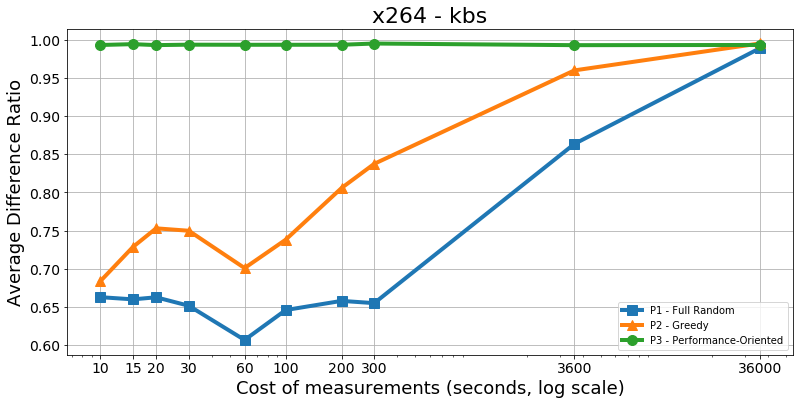

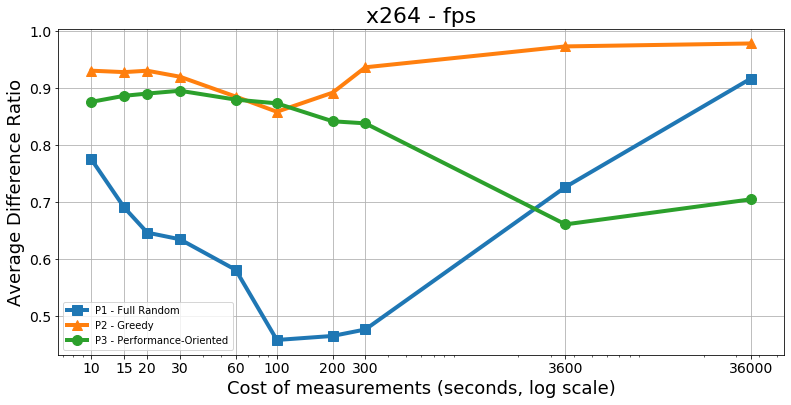

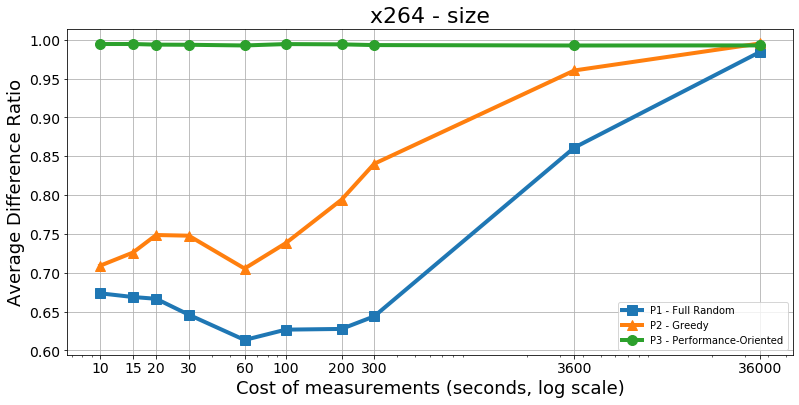

In [257]:
budget_vals = [10, 15, 20, 30, 60, 100, 200, 300, 3600, 36000]
ns = "x264"

for p in ["kbs", "fps", "size"]:
    res3 = [np.mean([p3_res[key] for key in p3_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res2 = [np.mean([p2_res[key] for key in p2_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res1 = [np.mean([p1_res[key] for key in p1_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    fig = plt.figure(figsize = (13, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(budget_vals, res1, markersize = 10, linewidth = 4, marker = 's', label = "P1 - Full Random")
    ax.plot(budget_vals, res2, markersize = 10, linewidth = 4, marker = "^", label = "P2 - Greedy")
    ax.plot(budget_vals, res3, markersize = 10, linewidth = 4, marker = 'o', label = "P3 - Performance-Oriented")
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.set_xticks(budget_vals, minor= False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.grid()
    plt.legend()
    plt.ylabel("Average Difference Ratio", size=18)
    plt.xlabel("Cost of measurements (seconds, log scale)", size=18)
    plt.title(ns+" - "+p, size = 22)
    plt.savefig('../results/policy_'+ns+'_'+p+'.png')
    plt.show()

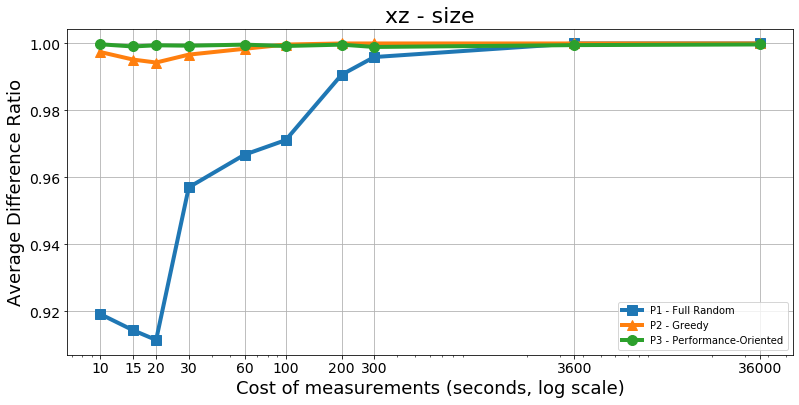

In [258]:
budget_vals = [10, 15, 20, 30, 60, 100, 200, 300, 3600, 36000]
ns = "xz"

for p in ["size"]:
    res3 = [np.mean([p3_res[key] for key in p3_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res2 = [np.mean([p2_res[key] for key in p2_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res1 = [np.mean([p1_res[key] for key in p1_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    fig = plt.figure(figsize = (13, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(budget_vals, res1, markersize = 10, linewidth = 4, marker = 's', label = "P1 - Full Random")
    ax.plot(budget_vals, res2, markersize = 10, linewidth = 4, marker = "^", label = "P2 - Greedy")
    ax.plot(budget_vals, res3, markersize = 10, linewidth = 4, marker = 'o', label = "P3 - Performance-Oriented")
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.set_xticks(budget_vals, minor= False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.grid()
    plt.legend()
    plt.ylabel("Average Difference Ratio", size=18)
    plt.xlabel("Cost of measurements (seconds, log scale)", size=18)
    plt.title(ns+" - "+p, size = 22)
    plt.savefig('../results/policy_'+ns+'_'+p+'.png')
    plt.show()

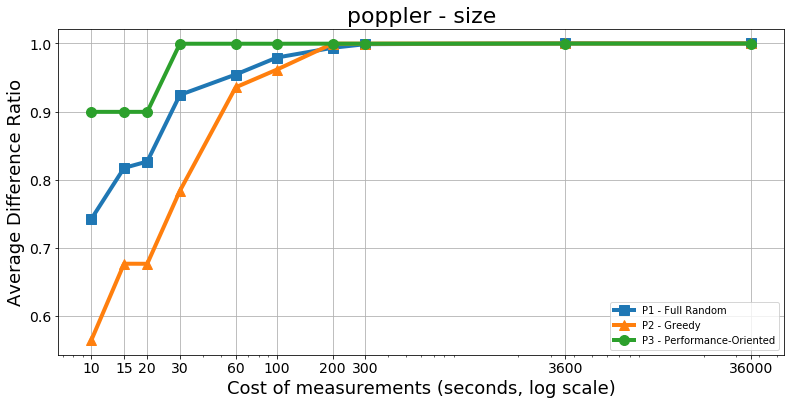

In [259]:
budget_vals = [10,15, 20, 30, 60, 100, 200, 300, 3600, 36000]
ns = "poppler"

for p in ["size"]:
    res3 = [np.mean([p3_res[key] for key in p3_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res2 = [np.mean([p2_res[key] for key in p2_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res1 = [np.mean([p1_res[key] for key in p1_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    fig = plt.figure(figsize = (13, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(budget_vals, res1, markersize = 10, linewidth = 4, marker = 's', label = "P1 - Full Random")
    ax.plot(budget_vals, res2, markersize = 10, linewidth = 4, marker = "^", label = "P2 - Greedy")
    ax.plot(budget_vals, res3, markersize = 10, linewidth = 4, marker = 'o', label = "P3 - Performance-Oriented")
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.set_xticks(budget_vals, minor= False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.grid()
    plt.legend()
    plt.ylabel("Average Difference Ratio", size=18)
    plt.xlabel("Cost of measurements (seconds, log scale)", size=18)
    plt.title(ns+" - "+p, size = 22)
    plt.savefig('../results/policy_'+ns+'_'+p+'.png')
    plt.show()

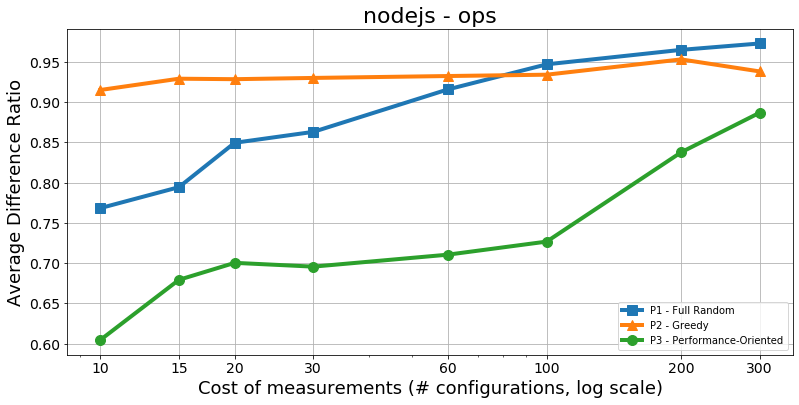

In [272]:
budget_vals = [10, 15, 20, 30, 60, 100, 200, 300]
ns = "nodejs"

for p in ["ops"]:
    res3 = [np.mean([p3_res[key] for key in p3_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res2 = [np.mean([p2_res[key] for key in p2_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    res1 = [np.mean([p1_res[key] for key in p1_res if key[0]==ns and key[2] ==p and key[3] == bv]) for bv in budget_vals]
    fig = plt.figure(figsize = (13, 6))
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(budget_vals, res1, markersize = 10, linewidth = 4, marker = 's', label = "P1 - Full Random")
    ax.plot(budget_vals, res2, markersize = 10, linewidth = 4, marker = "^", label = "P2 - Greedy")
    ax.plot(budget_vals, res3, markersize = 10, linewidth = 4, marker = 'o', label = "P3 - Performance-Oriented")
    ax.set_xscale('log')
    ax.get_xaxis().set_major_formatter(ScalarFormatter())
    ax.set_xticks(budget_vals, minor= False)
    ax.tick_params(axis='both', which='major', labelsize=14)
    plt.grid()
    plt.legend()
    plt.ylabel("Average Difference Ratio", size=18)
    plt.xlabel("Cost of measurements (# configurations, log scale)", size=18)
    plt.title(ns+" - "+p, size = 22)
    plt.savefig('../results/policy_'+ns+'_'+p+'.png')
    plt.show()